# Школьная олимпиада

## School - olympiads

## Содержание

В данном анализе используется набор данных 2021_Russian_data. 
Содержит информацию по итогам олимпиад школьников для России (и только для русского языка).

Датасет собран исключительно на основе открытых данных, преимущественно материалов жюри регионального и заключительного этапов олимпиады и документов региональных органов власти.

## Исходные данные

Данные в датасете неполны: 

- в некоторых случаях (и во всех случаях для заключительного этапа) информация об оценках участников за отдельные задания, о районе или школе отсутствует в исходных данных;

- данные о школе и о шифре участника в некоторых случаях не вводились в датасет.

Кроме того, данные об участниках анонимизированы: каждому участнику сопоставлен произвольный числовой код (поле ID).

В некоторых случаях исходные данные искажены (например, неверно или до апелляции подсчитаны результаты некоторых участников регионального этапа) без возможности восстановить истинную картину. 

Кроме того, в отдельных случаях данные отражают нарушение процедур организаторами или авторами файлов с исходными данными (например, в 2021 году все участники регионального этапа в Тамбовской области, не являющиеся победителями, охарактеризованы как Призеры).

# Модуль А. Предобработка количественных данных

## 1. Сбор данных

In [44]:
# Подключение библиотек.
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('2021_Russian_data.csv')

Данные загружены из csv файла

In [46]:
df.shape

(12515, 26)

In [47]:
#выводим все столбцы без сокращений
pd.set_option('display.max_columns', None)

df.head(10)

,SUBJECT,YEAR,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS,COMMENT
0,русский язык,2021,Адыгея,True,False,9.0,1.0,NaN,Город Майкоп,Гимназия No 22,8.5,0.0,2.0,0.0,4.0,3.5,2.0,3.5,23.5,26.1,NaN,оба,NaN,NaN,NaN,NaN
1,русский язык,2021,Адыгея,True,False,9.0,2.0,NaN,Кошехабльский район,СОШ No 8,4.5,0.0,2.0,0.0,5.5,4.5,2.0,1.5,20.0,22.2,NaN,оба,NaN,NaN,NaN,NaN
2,русский язык,2021,Адыгея,True,False,9.0,3.0,NaN,Гиагинский район,СОШ No 4,3.0,0.0,3.0,0.0,8.5,0.0,3.0,1.0,18.5,20.6,NaN,оба,NaN,NaN,NaN,NaN
3,русский язык,2021,Адыгея,True,False,9.0,4.0,NaN,Красногвардейский район,Гимназия No 1,5.5,1.0,1.0,3.0,5.5,0.5,0.0,1.5,18.0,20.0,NaN,оба,NaN,NaN,NaN,NaN
4,русский язык,2021,Адыгея,True,False,9.0,5.0,NaN,Красногвардейский район,СОШ No 2,8.5,0.0,2.0,0.0,4.5,0.0,0.0,1.0,16.0,17.8,NaN,оба,NaN,NaN,NaN,NaN
5,русский язык,2021,Адыгея,True,False,9.0,6.0,NaN,Кошехабльский район,СОШ No 8,4.5,0.0,2.0,0.0,7.0,0.0,0.0,1.5,15.0,16.7,NaN,оба,NaN,NaN,NaN,NaN
6,русский язык,2021,Адыгея,True,False,9.0,7.0,NaN,Кошехабльский район,СОШ No 8,7.0,0.0,1.0,0.0,4.5,0.0,0.5,0.0,13.0,14.4,NaN,оба,NaN,NaN,NaN,NaN
7,русский язык,2021,Адыгея,True,False,9.0,8.0,NaN,Гиагинский район,СОШ No 3,4.5,0.0,0.0,0.0,2.0,4.5,0.0,0.0,11.0,12.2,NaN,оба,NaN,NaN,NaN,NaN
8,русский язык,2021,Адыгея,True,False,9.0,9.0,NaN,ГБОУ РА АРГ,АРГ,5.0,0.0,0.0,0.0,1.5,3.5,1.0,0.0,11.0,12.2,NaN,оба,NaN,NaN,NaN,NaN
9,русский язык,2021,Адыгея,True,False,9.0,10.0,NaN,Майкопский район,ОЦ No 3,3.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,10.0,11.1,NaN,оба,NaN,NaN,NaN,NaN


Атрибуты с текстовым описанием:

SUBJECT: школьный предмет

YEAR: год состязания

REGION: регион России (включая аннексированные Республику Крым и Севастополь)

DATA_AVAILABLE: имеются ли данные для региона. Данные считались имеющимися, если хотя бы для победителей и призёров регионального этапа известны результаты в баллах или в процентах от теоретического максимума, а не только статусы победителя, призёра и т. п.

WINNERS_ONLY: представлены ли данные только для участников, получивших дипломы, или для всех участников регионального этапа в данном регионе. NB: для Свердловской области данные в принятом нами смысле имеются только для победителей, однако призёры включены в датасет; выбрано значение TRUE

GRADE_OF_COMPETITION: класс, задания для которого выполнял участник (9, 10 или 11)

ID: уникальный идентификатор участника (выбран произвольно)

CODE: шифр участника на региональном этапе

DISTRICT: район, город, муниципальное образование и т. д., к которому относится школа участника

SCHOOL: школа, за которую выступает участник

T1–T8: оценки участника в баллах за задания 1–8 регионального этапа. Несравнимы между классами!

SUM: сумма баллов участника за все задания регионального этапа. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 90 баллов, для 10 класса — 100 баллов, для 11 класса — 110 баллов; в 2022 году для 9 класса — 88 баллов, для 10 класса — 100 баллов, для 11 класса — 112 баллов

PERCENTAGE: процент, который сумма баллов участника на региональном этапе составляет от теоретического максимума

REGIONAL_STATUS: категория, к которой участник отнесён по итогам регионального этапа. Основными являются Победитель, Призер, Участник, а также пустая категория, по смыслу совпадающая со статусом Участника. Отнесение следует различным правилам в разных регионах, поэтому в общем случае статусы плохо сравнимы между регионами (для отбора на заключительный этап используются не они, а единый для страны проходной балл)

AUTHENTIC: какое из значений полей SUM и PERCENTAGE представлено в исходных данных, а какое вычислено при создании датасета. В случаях, когда исходным был процент выполнения (и тем более отсутствовали результаты проверки отдельных заданий), суммы несистематически приводились к разрешённому правилами шагу в 0,5 балла

FINAL_SUM: сумма баллов участника на заключительном этапе. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 150 баллов, для 10 класса — 165 баллов, для 11 класса — 180 баллов

FINAL_PERCENTAGE: процент, который сумма баллов участника на заключительном этапе составляет от теоретического максимума

FINAL_STATUS: категория, к которой участник отнесён по итогам заключительного этапа. Возможные значения: Победитель, Призер, Участник

COMMENT: неформальный комментарий

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT               12515 non-null  object 
 1   YEAR                  12515 non-null  int64  
 2   REGION                12515 non-null  object 
 3   DATA_AVAILABLE        12515 non-null  bool   
 4   WINNERS_ONLY          12507 non-null  object 
 5   GRADE_OF_COMPETITION  12507 non-null  float64
 6   ID                    12507 non-null  float64
 7   CODE                  3730 non-null   object 
 8   DISTRICT              5918 non-null   object 
 9   SCHOOL                3529 non-null   object 
 10  T1                    3552 non-null   float64
 11  T2                    3552 non-null   float64
 12  T3                    3551 non-null   float64
 13  T4                    3551 non-null   float64
 14  T5                    3552 non-null   float64
 15  T6                 

Загруженный набор данных имеет 12515 строк и 26 столбцов.

1 признак с типом данных bool, 14 признаков - float64, 1 признак - int64, 10 признаков - object.

DATA_AVAILABLE - тип данных bool (вещественный тип, с плавающей запятой), принимает 2 значения True/False, пропущенных значений не наблюдается;

YEAR - тип данных int64 (целочисленный тип), пропущенных значений не наблюдается;

GRADE_OF_COMPETITION, ID, T1, T2, T3, T4, T5, T6, T7, T8, SUM, PERCENTAGE, FINAL_SUM, FINAL_PERCENTAGE - тип данных float64, пропущенных значений в данных признаках наблюдается достаточно большое кол-во;

SUBJECT, REGION, WINNERS_ONLY, CODE, DISTRICT, SCHOOL, REGIONAL_STATUS, AUTHENTIC, FINAL_STATUS, COMMENT - тип данных object, пропущенных значений также наблюдается большое количество.

In [49]:
df.isnull().sum()

SUBJECT                     0
YEAR                        0
REGION                      0
DATA_AVAILABLE              0
WINNERS_ONLY                8
GRADE_OF_COMPETITION        8
ID                          8
CODE                     8785
DISTRICT                 6597
SCHOOL                   8986
T1                       8963
T2                       8963
T3                       8964
T4                       8964
T5                       8963
T6                       8963
T7                       8963
T8                       8965
SUM                       163
PERCENTAGE                164
REGIONAL_STATUS          2578
AUTHENTIC                 107
FINAL_SUM               12226
FINAL_PERCENTAGE        12226
FINAL_STATUS            12226
COMMENT                 12452
dtype: int64

В нашем загруженном наборе данных многие атрибуты имеют очень большое количество пропущенных значений, которые в дальнейшем нужно более подробно рассмотреть и обработать.

## 2. Предобработка данных

-	очистка данных от ошибок и аномалий;

-	обработка пропущенных значений;

-	определить критические значения из пропущенных;

-	оценена погрешность при допустимом количестве пропущенных значений;

-	преобразование типов данных;

-	оценка качества данных;

-	обработка дубликатов;


Определим процент пропущенных значений для дальнейшем работы с ними, их обработки.

In [50]:
df.isnull().mean() * 100

SUBJECT                  0.000000
YEAR                     0.000000
REGION                   0.000000
DATA_AVAILABLE           0.000000
WINNERS_ONLY             0.063923
GRADE_OF_COMPETITION     0.063923
ID                       0.063923
CODE                    70.195765
DISTRICT                52.712745
SCHOOL                  71.801838
T1                      71.618058
T2                      71.618058
T3                      71.626049
T4                      71.626049
T5                      71.618058
T6                      71.618058
T7                      71.618058
T8                      71.634039
SUM                      1.302437
PERCENTAGE               1.310427
REGIONAL_STATUS         20.599281
AUTHENTIC                0.854974
FINAL_SUM               97.690771
FINAL_PERCENTAGE        97.690771
FINAL_STATUS            97.690771
COMMENT                 99.496604
dtype: float64

 WINNERS_ONLY (0.06%), GRADE_OF_COMPETITION (0.06%), ID (0.06%) - атрибуты имеют низкий процент пропусков, их можно будет просто удалить, тк вряд ли сильно повлияют на результаты анализа.
 
 REGIONAL_STATUS (20.6%) - атрибут имеет средний процент пропусков, скорее всего это именно те участники, кто не смог пройти на региональный этап. Их можно будет заполнить определенным значением.
 
 CODE (70.20%), DISTRICT (52.71%), SCHOOL (71.80%), T1 (71.62%), T2 (71.62%), T3 (71.63%), T4 (71.63%), T5 (71.62%), T6 (71.62%), T7 (71.62%), T8 (71.63%) - атрибуты имеют высокий процент пропусков, что делает наш набор данных сильно неполноценным и недостоверным. Следует либо удалить, либо заполнить каким нибудь значением, тк эти атрибуты вполне могут иметь пропущенные значения.
 
 FINAL_SUM (97.69%), FINAL_PERCENTAGE (97.69%), FINAL_STATUS (97.69%), COMMENT (99.50%) - атрибуты практически не имеют данных. Следует их удалить или же заполнить другим значением.
 

In [51]:
df.duplicated().sum()

0

В наборе данных не были определены какие-либо дублирующиеся значения.

In [52]:
df['SUBJECT'].value_counts()

SUBJECT
русский язык    12515
Name: count, dtype: int64

Атрибут под названием SUBJECT содержит только 1 значение - русский язык, будет лучше удалить его, так как он не несет в себе какой либо смысловой нагрузки и совсем не будет влиять на наш датасет.

In [53]:
del df['SUBJECT']

In [54]:
df['YEAR'].value_counts()

YEAR
2021    12515
Name: count, dtype: int64

Атрибут под названием YEAR содержит только 1 значение - 2021, будет лучше также удалить его, так как он не несет в себе какой либо смысловой нагрузки и совсем не будет влиять на наш датасет

In [55]:
del df['YEAR']

In [56]:
df['COMMENT'].value_counts()

COMMENT
сумма исправлена                            12
сумма меньше на 1.5                          9
сумма меньше на 1                            8
апелляция к неуказанным заданиям             7
процент исправлен                            7
до апелляции?                                7
сумма больше на 1                            4
сумма меньше на 0.5                          4
на заключительном этапе в команде Москвы     3
сумма меньше на 2                            2
Name: count, dtype: int64

In [57]:
df['COMMENT'].replace({'сумма больше на 1': 'сумма исправлена'}, inplace=True)

Атрибут COMMENT также не несет в себе какой либо особой смысловой нагрузки, к тому же имеет практически 100-процентное кол-во пропущенных значений, будет лучше удалить данный столбец.

In [58]:
del df['COMMENT']

Не влияющие на набор данных атрибуты были удалены.

In [59]:
df['WINNERS_ONLY'].value_counts()

WINNERS_ONLY
False    12289
True       218
Name: count, dtype: int64

In [70]:
df.shape

(12507, 23)

In [35]:
df['WINNERS_ONLY'].dtype

dtype('bool')

Признак WINNERS_ONLY имеет тип данных object, но он также имеет всего лишь 2 значения - True/False. Заменим тип данных на bool.

In [33]:
df['WINNERS_ONLY'] = df['WINNERS_ONLY'].astype(np.bool_)

In [73]:
df['GRADE_OF_COMPETITION'].value_counts()

GRADE_OF_COMPETITION
10.0    4211
9.0     4206
11.0    4090
Name: count, dtype: int64

Можем заметить, что большинство участников учится в 10 классе и меньшинство в 11 классе.

Для лучшего анализа данных заменим признак GRADE_OF_COMPETITION на целочисленный тип данных

In [72]:
df = df[df['GRADE_OF_COMPETITION'].notnull()]

In [69]:
df = df[df['WINNERS_ONLY'].notnull()]

In [887]:
df['GRADE_OF_COMPETITION'] = df['GRADE_OF_COMPETITION'].astype(np.int64)

In [ ]:
# Избавляемся от пустых значений, тк данные атрибуты имеют низкий процент пропусков и имеют незначительное влияние на наш набор данных.

In [888]:
df['ID'].value_counts()

ID
1.0        1
8355.0     1
8333.0     1
8334.0     1
8335.0     1
          ..
4172.0     1
4173.0     1
4174.0     1
4175.0     1
12507.0    1
Name: count, Length: 12507, dtype: int64

Для лучшего анализа данных заменим также признак ID на целочисленный тип данных.

In [889]:
df['ID'] = df['ID'].astype(np.int64)

In [890]:
df['REGIONAL_STATUS'].value_counts()

REGIONAL_STATUS
Участник             6199
Призер               2870
неявка                436
Победитель            421
отмечен                 8
дисквалифицирован       2
удален                  1
Name: count, dtype: int64

Так как статус должен быть только в 3 значениях(победитель/призер/участник), мы вынуждены исключить те данные, в которых люди были дисквалифицированы, удалены, отмечены (также их малое кол-во, поэтому они не будут существенно влиять на датасет)

In [891]:
df = df[df['REGIONAL_STATUS'] != 'удален']
df = df[df['REGIONAL_STATUS'] != 'дисквалифицирован']
df = df[df['REGIONAL_STATUS'] != 'отмечен']

In [892]:
df[df['REGIONAL_STATUS'] == 'неявка']

,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,AUTHENTIC,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS
5156,Москва,True,False,11,5157,22678119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,неявка,оба,NaN,NaN,NaN
5157,Москва,True,False,11,5158,22677899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,неявка,оба,NaN,NaN,NaN
5158,Москва,True,False,11,5159,22678434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,неявка,оба,NaN,NaN,NaN
5159,Москва,True,False,11,5160,22678334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,неявка,оба,NaN,NaN,NaN
5160,Москва,True,False,11,5161,22677831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,неявка,оба,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Нижегородская область,True,False,11,10822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,неявка,оба,NaN,NaN,NaN
11044,Пермский край,True,False,10,11045,NaN,Пермь,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,неявка,оба,NaN,NaN,NaN
11045,Пермский край,True,False,10,11046,NaN,Пермь,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,неявка,оба,NaN,NaN,NaN
11046,Пермский край,True,False,10,11047,NaN,Чернушинский городской округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,неявка,оба,NaN,NaN,NaN


Также у статуса есть 4 значение - "неявка", значит это те школьники, которые не смогли пройти в региональный этап, заменим на более понятное значение - "Не прошел в региональный этап"

In [893]:
df['REGIONAL_STATUS'] = df['REGIONAL_STATUS'].replace('неявка', 'Не прошел в региональный этап')

Скорее всего пропущенные значения в атрибуте REGIONAL_STATUS, также означают не прошедших участников на региональный этап, заменим его на такое же значение - "Не прошел в региональный этап"

In [894]:
df['REGIONAL_STATUS'] = df['REGIONAL_STATUS'].fillna(0)

In [895]:
df['REGIONAL_STATUS'] = df['REGIONAL_STATUS'].replace(0, 'Не прошел в региональный этап')

In [896]:
df['WINNERS_ONLY'].value_counts()

WINNERS_ONLY
False    12278
True       218
Name: count, dtype: int64

In [897]:
df.isnull().sum()

REGION                      0
DATA_AVAILABLE              0
WINNERS_ONLY                0
GRADE_OF_COMPETITION        0
ID                          0
CODE                     8766
DISTRICT                 6580
SCHOOL                   8970
T1                       8952
T2                       8952
T3                       8953
T4                       8953
T5                       8952
T6                       8952
T7                       8952
T8                       8954
SUM                       154
PERCENTAGE                155
REGIONAL_STATUS             0
AUTHENTIC                  99
FINAL_SUM               12207
FINAL_PERCENTAGE        12207
FINAL_STATUS            12207
dtype: int64

In [898]:
df['FINAL_STATUS'].value_counts()

FINAL_STATUS
Участник      149
Призер        115
Победитель     25
Name: count, dtype: int64

Видимо пропущенные значения в FINAL_STATUS означают то, что участники не прошли на заключительный этап, заменим их на более понятное значение - "Не прошел на заключительный этап"

In [899]:
df['FINAL_STATUS'] = df['FINAL_STATUS'].fillna(0)

In [900]:
df['FINAL_STATUS'] = df['FINAL_STATUS'].replace(0, 'Не прошел в заключительный этап')

CODE - означает код участника на региональном этапе, значит пропущенные значение это те, которые не прошли в региональный этап, следует заменить их на какое-либо значение, например на "Не прошел в региональный этап"

In [901]:
df['CODE'] = df['CODE'].fillna(0)

In [902]:
df['CODE'] = df['CODE'].replace(0, 'Не прошел в региональный этап')

In [903]:
df['CODE'].value_counts()

CODE
Не прошел в региональный этап    8766
10-04                               2
49-РЯ-11                            2
53-РЯ-9                             2
10-10                               2
                                 ... 
22677130                            1
22676894                            1
22677424                            1
22678340                            1
59-РЯ-11                            1
Name: count, Length: 3713, dtype: int64

DISTRICT - атрибут имеет тоже большое кол-во пропущенных значений, оставим их как есть, просто заменим на более понятное значение.

In [904]:
df['DISTRICT'] = df['DISTRICT'].fillna(0)

In [905]:
df['DISTRICT'].value_counts()

DISTRICT
0                                6580
Челябинский городской округ       198
г. Самара                         177
город Новосибирск                 117
Омск                              108
                                 ... 
Читинский район; с.Шишкино          1
Читинский район; с. Домна           1
Пгт. Атамановка                     1
Оловяннинский район; ст.Ясная       1
город Ирбит                         1
Name: count, Length: 872, dtype: int64

In [906]:
df['DISTRICT'] = df['DISTRICT'].replace(0, 'Район не указан')

Сделаем то же самое с атрибутом SCHOOL, тк могли просто забыть указать школу участников...

In [907]:
df['SCHOOL'] = df['SCHOOL'].fillna(0)

In [908]:
df['SCHOOL'] = df['SCHOOL'].replace(0, 'Школа не указана')

In [909]:
df['SCHOOL'].value_counts()

SCHOOL
Школа не указана                                                                                                                                                      8970
Муниципальное бюджетное общеобразовательное учреждение «Лицей № 13»                                                                                                     43
Муниципальное автономное общеобразовательное учреждение «Гимназия № 80 г. Челябинска»                                                                                   32
Муниципальное бюджетное общеобразовательное учреждение «Средняя общеобразовательная школа № 2»                                                                          30
БОУ ОО «МОЦРО №117»                                                                                                                                                     30
                                                                                                                                          

Проверим остальные атрибуты

In [77]:
df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'SUM', 'PERCENTAGE', 'FINAL_SUM', 'FINAL_PERCENTAGE']]

,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,FINAL_SUM,FINAL_PERCENTAGE
0,8.5,0.0,2.0,0.0,4.0,3.5,2.0,3.5,23.5,26.1,NaN,NaN
1,4.5,0.0,2.0,0.0,5.5,4.5,2.0,1.5,20.0,22.2,NaN,NaN
2,3.0,0.0,3.0,0.0,8.5,0.0,3.0,1.0,18.5,20.6,NaN,NaN
3,5.5,1.0,1.0,3.0,5.5,0.5,0.0,1.5,18.0,20.0,NaN,NaN
4,8.5,0.0,2.0,0.0,4.5,0.0,0.0,1.0,16.0,17.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12510,2.5,0.0,8.0,6.5,2.5,2.5,8.5,6.0,36.5,33.2,NaN,NaN
12511,5.0,1.0,5.0,3.5,4.0,5.5,1.5,5.5,31.0,28.2,NaN,NaN
12512,6.0,0.0,0.0,3.5,5.0,5.5,5.0,4.5,29.5,26.8,NaN,NaN
12513,4.5,0.0,6.0,4.0,0.0,4.5,3.5,4.0,26.5,24.1,NaN,NaN


In [911]:
df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'SUM', 'PERCENTAGE', 'FINAL_SUM', 'FINAL_PERCENTAGE']] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'SUM', 'PERCENTAGE','FINAL_SUM', 'FINAL_PERCENTAGE']].fillna(0)

Данные атрибуты могут иметь пропущенные значения, тк участник мог просто пропустить задание (не выполнить), поэтому мы заменим их на явные значения.

AUTHENTIC - не представляет для нашего набора данных какой-либо информационной ценности, поэтому мы вынуждены удалить их.

In [912]:
del df['AUTHENTIC']

In [913]:
df.isnull().sum()

REGION                  0
DATA_AVAILABLE          0
WINNERS_ONLY            0
GRADE_OF_COMPETITION    0
ID                      0
CODE                    0
DISTRICT                0
SCHOOL                  0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
T7                      0
T8                      0
SUM                     0
PERCENTAGE              0
REGIONAL_STATUS         0
FINAL_SUM               0
FINAL_PERCENTAGE        0
FINAL_STATUS            0
dtype: int64

In [914]:
df.describe(include='object')

,REGION,CODE,DISTRICT,SCHOOL,REGIONAL_STATUS,FINAL_STATUS
count,12496,12496,12496,12496,12496,12496
unique,77,3713,872,1611,4,4
top,Москва,Не прошел в региональный этап,Район не указан,Школа не указана,Участник,Не прошел в заключительный этап
freq,3132,8766,6580,8970,6199,12207


In [915]:
df.describe()

,GRADE_OF_COMPETITION,ID,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,FINAL_SUM,FINAL_PERCENTAGE
count,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000
mean,9.990877,6251.544494,1.512844,0.294854,1.057899,0.517318,1.023968,0.724432,0.784291,1.037980,26.019889,26.090265,2.058099,1.240174
std,0.814384,3609.423472,2.675623,1.082672,2.351766,1.556548,2.163173,1.621159,1.998865,2.411807,15.690866,15.665308,13.656813,8.201245
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3126.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,14.500000,0.000000,0.000000
50%,10.000000,6250.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,24.090000,0.000000,0.000000
75%,11.000000,9374.250000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,35.500000,0.000000,0.000000
max,11.000000,12507.000000,14.000000,13.000000,12.000000,11.500000,16.000000,12.000000,14.000000,18.500000,96.500000,90.000000,130.500000,75.151515


In [916]:
df[df['REGIONAL_STATUS'] == 'Победитель'][['SUM', 'PERCENTAGE', 'REGIONAL_STATUS']].sort_values(by='SUM', ascending=True).head(10)

,SUM,PERCENTAGE,REGIONAL_STATUS
353,31.0,34.4,Победитель
366,31.0,31.0,Победитель
8050,33.0,36.7,Победитель
1740,34.0,37.4,Победитель
43,35.0,38.9,Победитель
2191,37.0,41.1,Победитель
1626,38.5,42.8,Победитель
7952,39.0,35.0,Победитель
1995,40.0,36.4,Победитель
10115,40.0,40.0,Победитель


In [917]:
df[df['REGIONAL_STATUS'] == 'Победитель'][['SUM', 'PERCENTAGE', 'REGIONAL_STATUS']].sort_values(by='SUM', ascending=False).head(10)

,SUM,PERCENTAGE,REGIONAL_STATUS
11066,96.5,87.70,Победитель
5270,90.0,90.00,Победитель
5271,87.0,87.00,Победитель
5272,85.5,85.50,Победитель
5273,85.5,85.50,Победитель
3747,84.0,76.36,Победитель
5274,84.0,84.00,Победитель
4280,83.5,75.90,Победитель
4281,83.5,75.90,Победитель
4282,82.0,74.50,Победитель


Вывели с каких значений участник будет считаться победителем, видимо с 30 баллов - победитель, что немного некорректно, тк максимальный балл победителей - 96 баллов.

In [918]:
df['REGIONAL_STATUS'].value_counts()

REGIONAL_STATUS
Участник                         6199
Не прошел в региональный этап    3006
Призер                           2870
Победитель                        421
Name: count, dtype: int64

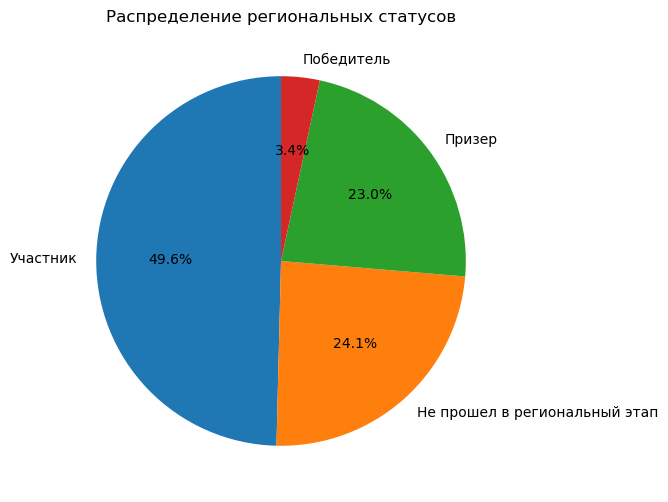

In [919]:
import matplotlib.pyplot as plt

status_counts_region = df['REGIONAL_STATUS'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(status_counts_region,
        labels=status_counts_region.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение региональных статусов')
plt.show()

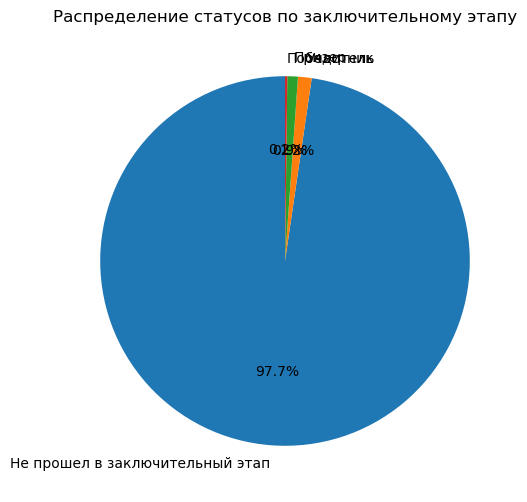

In [920]:
status_counts = df['FINAL_STATUS'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение статусов по заключительному этапу')
plt.show()

In [921]:
df = df.reset_index(drop=True)

In [931]:
df[(df['FINAL_STATUS'] == 'Участник') & (df['REGIONAL_STATUS'] == 'Участник')]


,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS
8037,Севастополь [аннексирован],True,False,10,8040,10-04,Район не указан,Государственное бюджетное общеобразовательное ...,9.5,5.0,5.0,0.0,2.0,7.0,5.0,13.0,46.5,46.5,Участник,81.0,49.090909,Участник


In [770]:
excel_file_name = 'l_r.csv'

df.to_csv(excel_file_name, index=False)

print(f"DataFrame успешно сохранен в файл: {excel_file_name}")

DataFrame успешно сохранен в файл: l_r.csv


# 4. Итоговый отчёт

### 1. **Сбор данных**

В проделанной работе был успешно загружен набор данных 2021_Russian_data. 
Содержит информацию по итогам олимпиад школьников для России (и только для русского языка за 2021 год).

### 2. **Предобработка данных**

Были оценены допустимые проценты пропущенных значений, из которых был сделан вывод о том, какие атрибуты лучше заполнить, а какие следует удалить для лучшего качества данных.

Наличие дубликатов в датасете не выявлено, определенные типы данных были успешно изменены. 

Также была проведена успешная обработка пропущенных значений, по итогу которой некоторые атрибуты были исключены из датасета, в некоторых заполнены пропуски необходимыми значениями.

Явных аномалий и ошибок в наборе данных выявлено не было.

### 3. **Описание структуры набора данных**

Было проведено исследование данных, которое показало нам количество строк/столбцов в загруженном датасете. Также было выполнено текстовое описание каждого из атрибутов. Пропущенных значений в датасете оказалось большое количество.

### 4. **Заключение**

В результате проделанной работы:

Устранены пропущенные значения: Удалив или заполнив их, избежали искажения результатов анализа и повысили надежность моделирования.

Аномальные значения и какие-либо ошибки выявлены не были.

Были отобраны важные признаки, которые могут значительно влиять друг на друга.

## Обработанный датасет был загружен в файл 'l_r.csv'

#

#

#

# Модуль Б. Анализ количественных данных

0.	Анализ основных свойств данных: расчёт и анализ не менее 5 основных статистических параметров выбранных характеристик с анализом результатов, построение графиков распределения для всех атрибутов.

1.	Поиск зависимостей одних показателей от других.

2.	Поиск закономерностей: выявление закономерностей с анализом результатов.

3.	Определить тенденцию развития олимпиадного движения в регионе. Проверить точность прогноза и сделать выводы. 

4.	Проверка нормальности распределения: выполнена проверка на нормальность распределения и сделаны выводы

5.	Формулирование выводов и построение отчёта написать аналитическую записку с основными показателями, графиками и диаграммами, и выводами.

6.	Визуализация данных: построить интерактивный дашборд с полезными элементами (не менее 5). Выполнить фильтрацию данных по необходимым пол (не менее 3), например, по муниципалитету, этапу олимпиады и предмету. Визуализация должна наглядно отображать рост или снижение показателей.


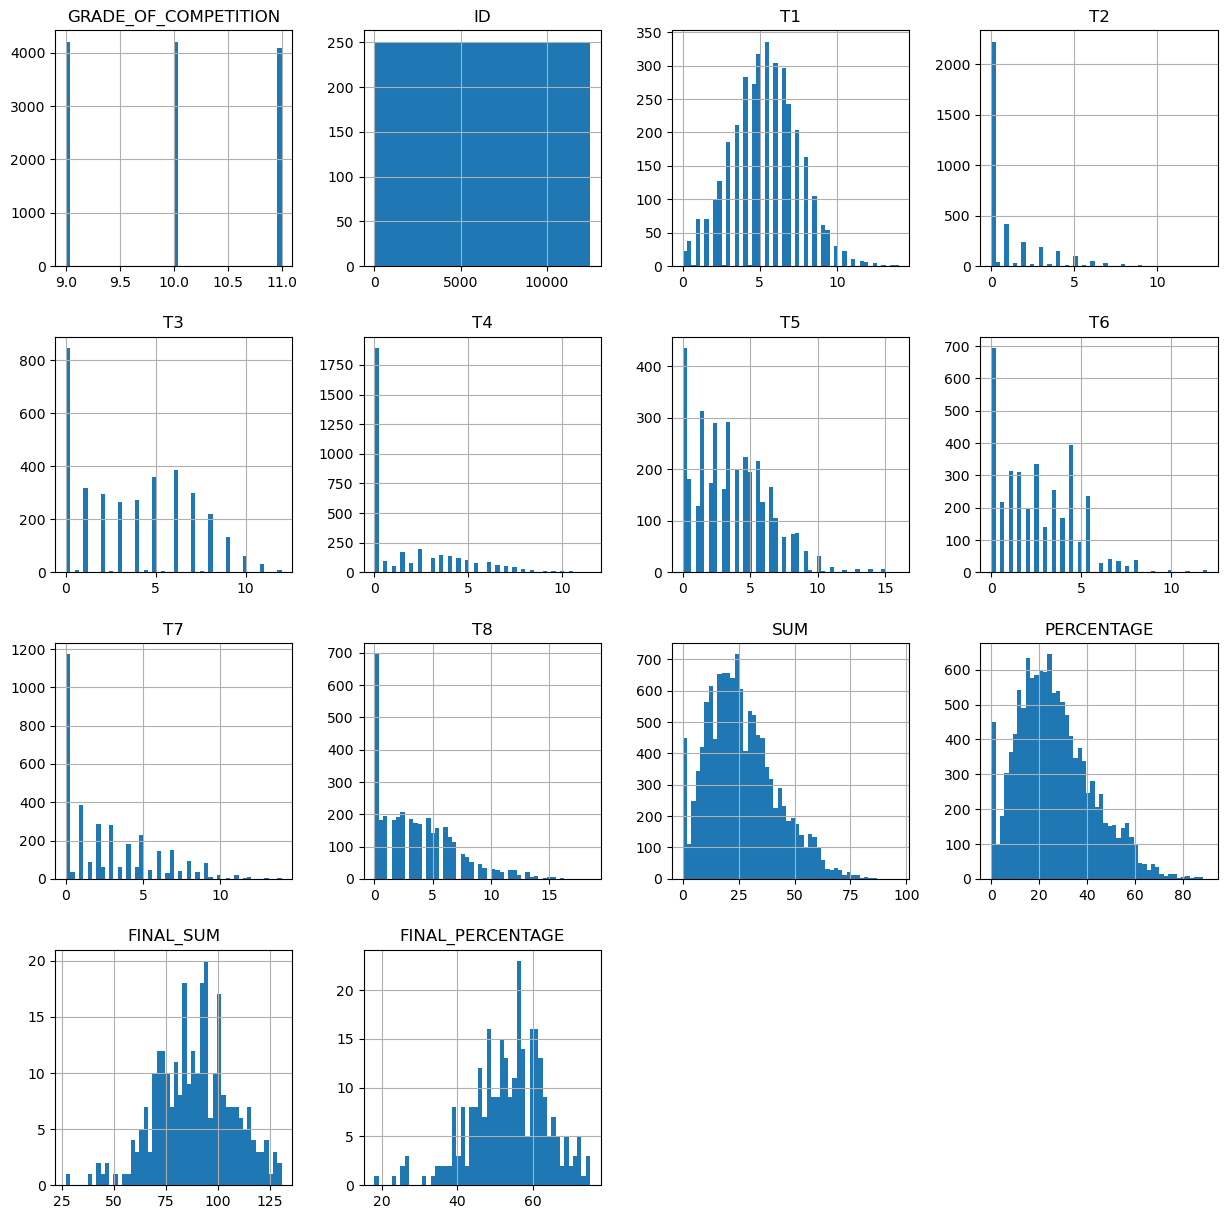

In [78]:
df.hist(figsize = (15,15), bins = 50);

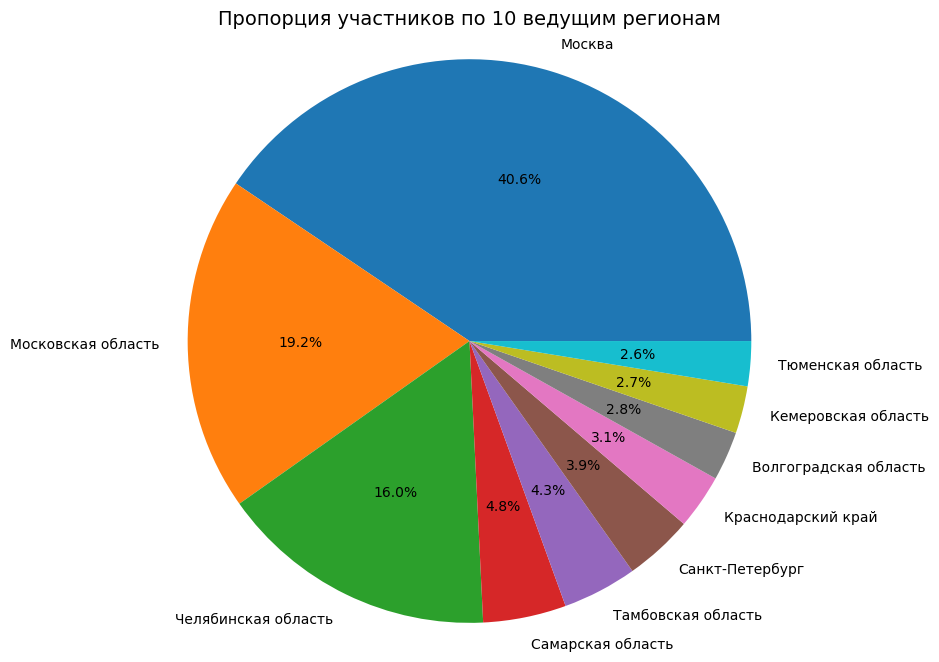

In [772]:
data = {'Region': ['Москва', 'Московская область', 'Челябинская область', 'Самарская область', 'Тамбовская область', 
               'Санкт-Петербург', 'Краснодарский край', 'Волгоградская область', 'Кемеровская область', 'Тюменская область'],
    'Participants': [3132, 1486, 1234, 368, 330, 305, 242, 218, 209, 199] }

df1 = pd.DataFrame(data)

plt.figure(figsize=(8, 8))
plt.pie(df1['Participants'], labels=df1['Region'], autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Пропорция участников по 10 ведущим регионам', fontsize=14)
plt.axis('equal')
plt.show()

In [773]:
df.describe()

,GRADE_OF_COMPETITION,ID,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,FINAL_SUM,FINAL_PERCENTAGE
count,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000
mean,9.990877,6251.544494,1.512844,0.294854,1.057899,0.517318,1.023968,0.724432,0.784291,1.037980,26.019889,26.090265,2.058099,1.240174
std,0.814384,3609.423472,2.675623,1.082672,2.351766,1.556548,2.163173,1.621159,1.998865,2.411807,15.690866,15.665308,13.656813,8.201245
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3126.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,14.500000,0.000000,0.000000
50%,10.000000,6250.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,24.090000,0.000000,0.000000
75%,11.000000,9374.250000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,35.500000,0.000000,0.000000
max,11.000000,12507.000000,14.000000,13.000000,12.000000,11.500000,16.000000,12.000000,14.000000,18.500000,96.500000,90.000000,130.500000,75.151515


YEAR:
- минимальное и максимальное значение 2021
- среднее и квартили также равны 2021
- стандартное отклонение равно 0

GRADE_OF_COMPETITION:
- минимальное значение 9
- максимальное значение 11
- среднее равно приблизительно 10
- стандартное 0.8
- квартили распределены равномерно

T1 (одно из заданий):
- минимальное значение 0
- максимальное значение 14
- среднее равно 1.5
- стандартное 2.7
- квартиль в 75% равен 3, другие равны 0

In [774]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [775]:
df['REGION'] = le.fit_transform(df['REGION'])
df['WINNERS_ONLY'] = le.fit_transform(df['WINNERS_ONLY'])
df['GRADE_OF_COMPETITION'] = le.fit_transform(df['GRADE_OF_COMPETITION'])
df['DISTRICT'] = le.fit_transform(df['DISTRICT'])

df['SCHOOL'] = le.fit_transform(df['SCHOOL'])

df['FINAL_STATUS'] = le.fit_transform(df['FINAL_STATUS'])
df['DATA_AVAILABLE'] = le.fit_transform(df['DATA_AVAILABLE'])

In [776]:
df['REGIONAL_STATUS'] = le.fit_transform(df['REGIONAL_STATUS'])

In [777]:
df

,REGION,DATA_AVAILABLE,WINNERS_ONLY,GRADE_OF_COMPETITION,ID,CODE,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS
0,0,0,0,0,1,Не прошел в региональный этап,130,78,8.5,0.0,2.0,0.0,4.0,3.5,2.0,3.5,23.5,26.1,0,0.0,0.0,0
1,0,0,0,0,2,Не прошел в региональный этап,265,1537,4.5,0.0,2.0,0.0,5.5,4.5,2.0,1.5,20.0,22.2,0,0.0,0.0,0
2,0,0,0,0,3,Не прошел в региональный этап,126,1533,3.0,0.0,3.0,0.0,8.5,0.0,3.0,1.0,18.5,20.6,0,0.0,0.0,0
3,0,0,0,0,4,Не прошел в региональный этап,274,76,5.5,1.0,1.0,3.0,5.5,0.5,0.0,1.5,18.0,20.0,0,0.0,0.0,0
4,0,0,0,0,5,Не прошел в региональный этап,274,1531,8.5,0.0,2.0,0.0,4.5,0.0,0.0,1.0,16.0,17.8,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12491,32,0,1,2,12503,Не прошел в региональный этап,469,1561,2.5,0.0,8.0,6.5,2.5,2.5,8.5,6.0,36.5,33.2,2,0.0,0.0,0
12492,32,0,1,2,12504,Не прошел в региональный этап,469,1561,5.0,1.0,5.0,3.5,4.0,5.5,1.5,5.5,31.0,28.2,2,0.0,0.0,0
12493,32,0,1,2,12505,Не прошел в региональный этап,469,1561,6.0,0.0,0.0,3.5,5.0,5.5,5.0,4.5,29.5,26.8,2,0.0,0.0,0
12494,32,0,1,2,12506,Не прошел в региональный этап,469,1561,4.5,0.0,6.0,4.0,0.0,4.5,3.5,4.0,26.5,24.1,2,0.0,0.0,0


Так как пропусков было очень много, которых нельзя было удалить или заменить на среднее значение, они были заменены на 0, что дало невозможность точно просмотреть распределение данных.

Все значения сконцентрированы в одном году в 2021. Поэтому можно наконец сделать вывод, что столбец YEAR не несет полезной информации.

Большинство олимпиаду писали 9 класс

В основном хорошо решали задания Т1, Т3, Т5.

SUM и PERCENTAGE имеет вид похожий на нормальное распределение.

В дальнейшем для рассматривания различных закономерностей и зависимостей можно не брать столбцы ID, CODE, DATA_AVAILABLE.

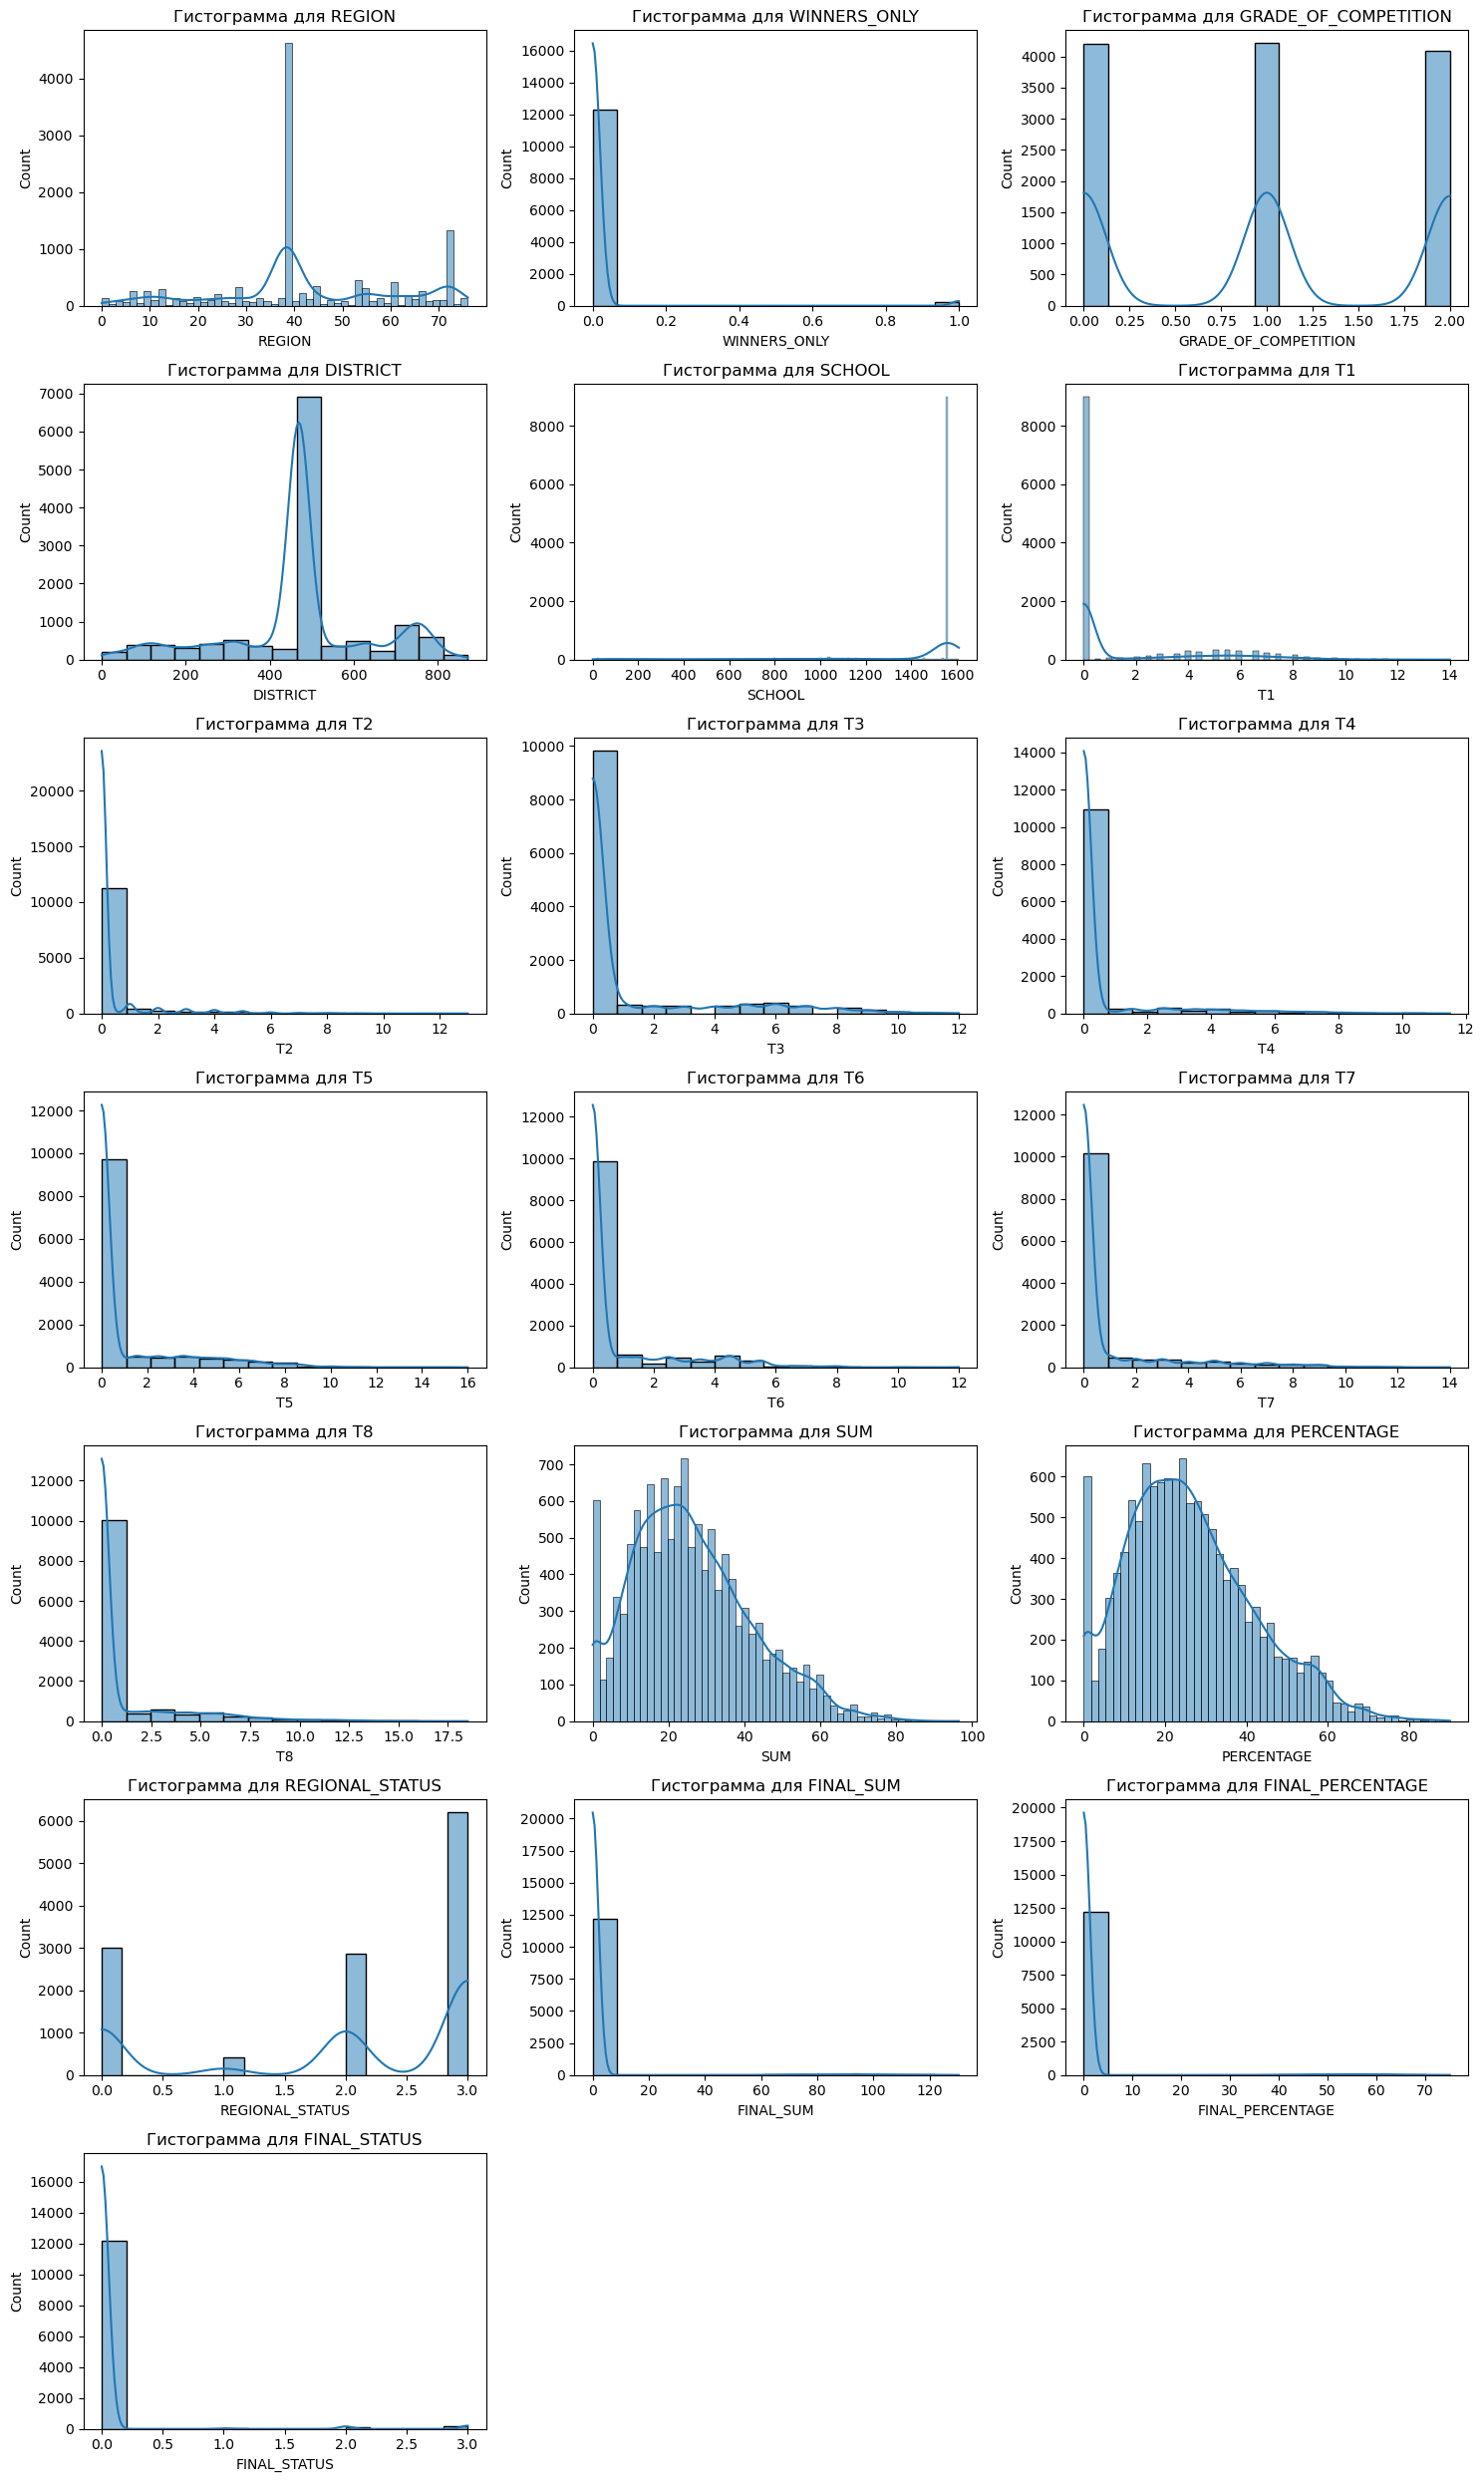

In [779]:
import seaborn as sns

select_columns = ['REGION', 'WINNERS_ONLY', 'GRADE_OF_COMPETITION', 'DISTRICT', 'SCHOOL', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'SUM', 'PERCENTAGE', 'REGIONAL_STATUS', 'FINAL_SUM', 'FINAL_PERCENTAGE', 'FINAL_STATUS']  # Замените на ваши названия столбцов
numerical_columns = df[select_columns]

num_rows = 7 # кол-во строк
num_cols = 3 # кол-во столбцов
plt.figure(figsize=(15, 25)) # размер 

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1) # оси для графиков
    sns.histplot(df[column], kde=True)
    plt.title(f"Гистограмма для {column}")
plt.tight_layout()
plt.show()

REGION:

    Заметно, что некоторые регионы представлены чаще других. Не является непрерывным распределением, но есть некоторая неравномерность.
    
WINNERS_ONLY:

    Заметно сильное смещение в сторону 0. Данный признак является бинарным, значит значений False намного больше.
    
DISTRICT:
    
    Распределение с одним сильно выраженным пиком, но есть и другие значения. Большинство данных относится к одному району, но есть и другие районы.
    
T1 - T8:

    Распределения смещены влево, с большим количеством нулей. Данные T1-T8 не имеют нормального распределения, и сильно смещены.

SUM:

    Распределение с выраженным пиком, смещено вправо. Сумма не является нормально распределенной, с большим количеством значений в среднем диапазоне.

PERCENTAGE:

    Распределение приближается к нормальному, с небольшим смещением. Имеет более-менее нормальное распределение.

In [780]:
df_selected = df[select_columns]

correlation_matrix = df_selected.corr()

correlation_matrix

,REGION,WINNERS_ONLY,GRADE_OF_COMPETITION,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS
REGION,1.000000,0.041697,-0.035170,0.088862,0.029975,0.163669,0.005018,0.094012,0.041852,0.134081,0.078491,0.116602,0.096115,-0.046234,-0.043979,0.256032,-0.007691,-0.008056,-0.013776
WINNERS_ONLY,0.041697,1.000000,0.012001,-0.065007,-0.022203,0.062185,0.118970,0.055720,0.128698,0.078634,0.071479,0.056887,0.087874,-0.010583,-0.012579,-0.015473,0.026646,0.025983,0.028699
GRADE_OF_COMPETITION,-0.035170,0.012001,1.000000,-0.001177,-0.021974,0.013262,0.050251,0.032180,0.061555,-0.086693,0.013372,0.135419,0.030712,0.101677,-0.028212,-0.026643,0.023067,0.012951,0.009201
DISTRICT,0.088862,-0.065007,-0.001177,1.000000,0.048367,-0.114188,-0.035918,-0.087733,-0.053300,-0.095868,-0.086449,-0.070581,-0.061208,0.053606,0.054983,-0.030023,0.002983,0.003387,-0.000434
SCHOOL,0.029975,-0.022203,-0.021974,0.048367,1.000000,-0.271966,-0.138908,-0.198840,-0.140949,-0.221492,-0.231671,-0.204377,-0.194338,0.097929,0.102507,0.192487,0.041853,0.041610,0.037795
T1,0.163669,0.062185,0.013262,-0.114188,-0.271966,1.000000,0.510787,0.728426,0.592916,0.760353,0.707908,0.655709,0.735380,0.061012,0.059726,-0.070543,-0.012114,-0.011572,-0.011748
T2,0.005018,0.118970,0.050251,-0.035918,-0.138908,0.510787,1.000000,0.428315,0.466387,0.465179,0.455306,0.442364,0.523274,0.183706,0.177453,-0.040671,0.067603,0.068222,0.066762
T3,0.094012,0.055720,0.032180,-0.087733,-0.198840,0.728426,0.428315,1.000000,0.585267,0.637660,0.607760,0.554696,0.665703,0.138809,0.135208,-0.086943,0.007181,0.007925,0.005072
T4,0.041852,0.128698,0.061555,-0.053300,-0.140949,0.592916,0.466387,0.585267,1.000000,0.552189,0.538237,0.507547,0.691425,0.219031,0.210604,-0.092203,0.050718,0.052000,0.045258
T5,0.134081,0.078634,-0.086693,-0.095868,-0.221492,0.760353,0.465179,0.637660,0.552189,1.000000,0.630951,0.565585,0.677999,0.115961,0.126724,-0.066547,0.010881,0.011574,0.007355


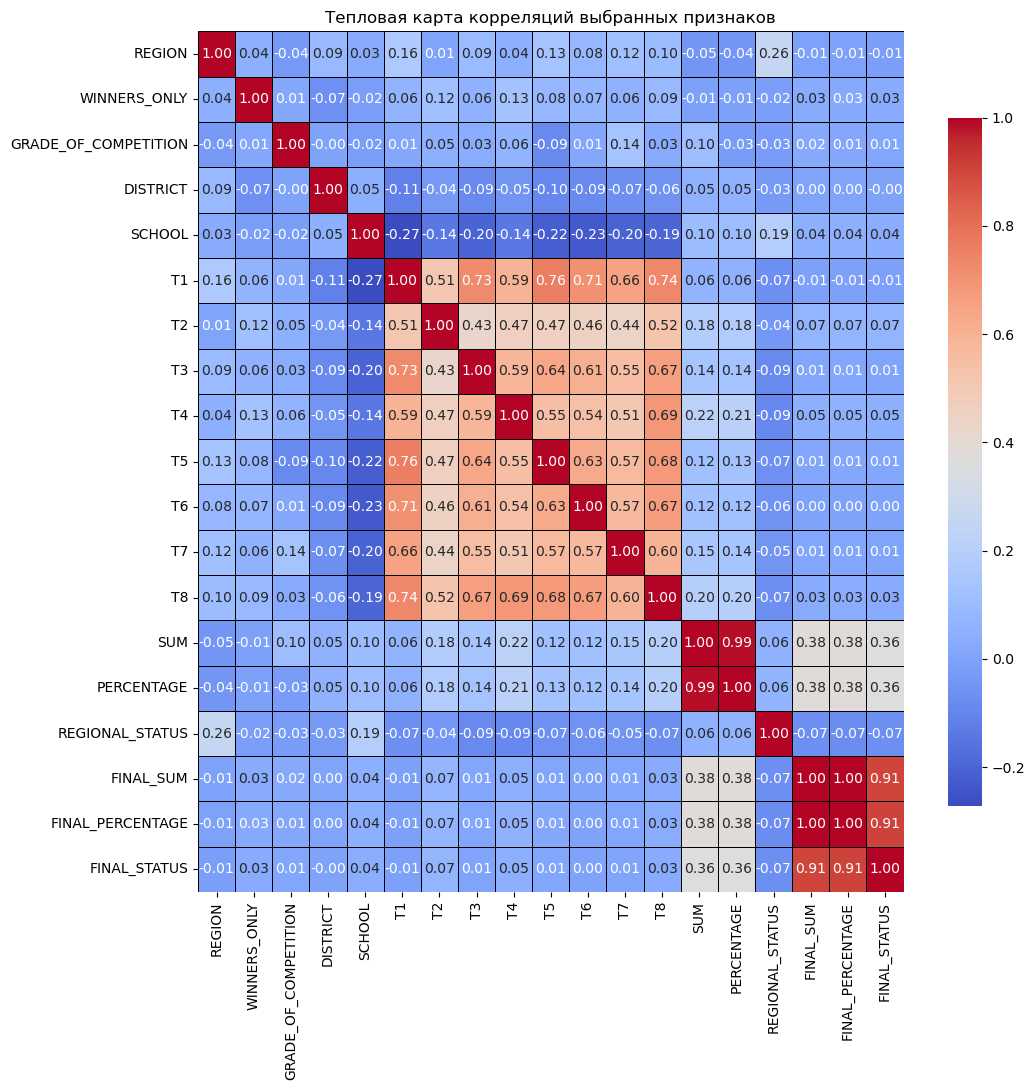

In [781]:
plt.figure(figsize=(11, 11))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=.5, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций выбранных признаков')

plt.tight_layout()
plt.show()

    Группа T1-T8: Наблюдается очень сильная положительная корреляция между признаками T1, T2, T3, T4, T5, T6, T7, T8. Это говорит о том, что эти признаки практически дублируют друг друга, и их значения изменяются синхронно.

    SUM и PERCENTAGE: Очень сильная положительная корреляция (0.99). Это означает, что оба признака почти идентичны, что является верным, тк процент рассчитывается с помощью суммы.

    FINAL_SUM, FINAL_PERCENTAGE, FINAL_STATUS: Очень сильная корреляция между тремя признаками (больше 0.9).

    WINNERS_ONLY, GRADE_OF_COMPETITION, DISTRICT и SCHOOL имеют слабую корреляцию с другими признаками.
    
    REGION и REGIONAL_STATUS имеют слабую отрицательную корреляцию (-0.26).
  
    Признаки WINNERS_ONLY, GRADE_OF_COMPETITION, DISTRICT и SCHOOL имеют слабую корреляцию с другими признаками, что может говорить о том, что эти признаки не так важны

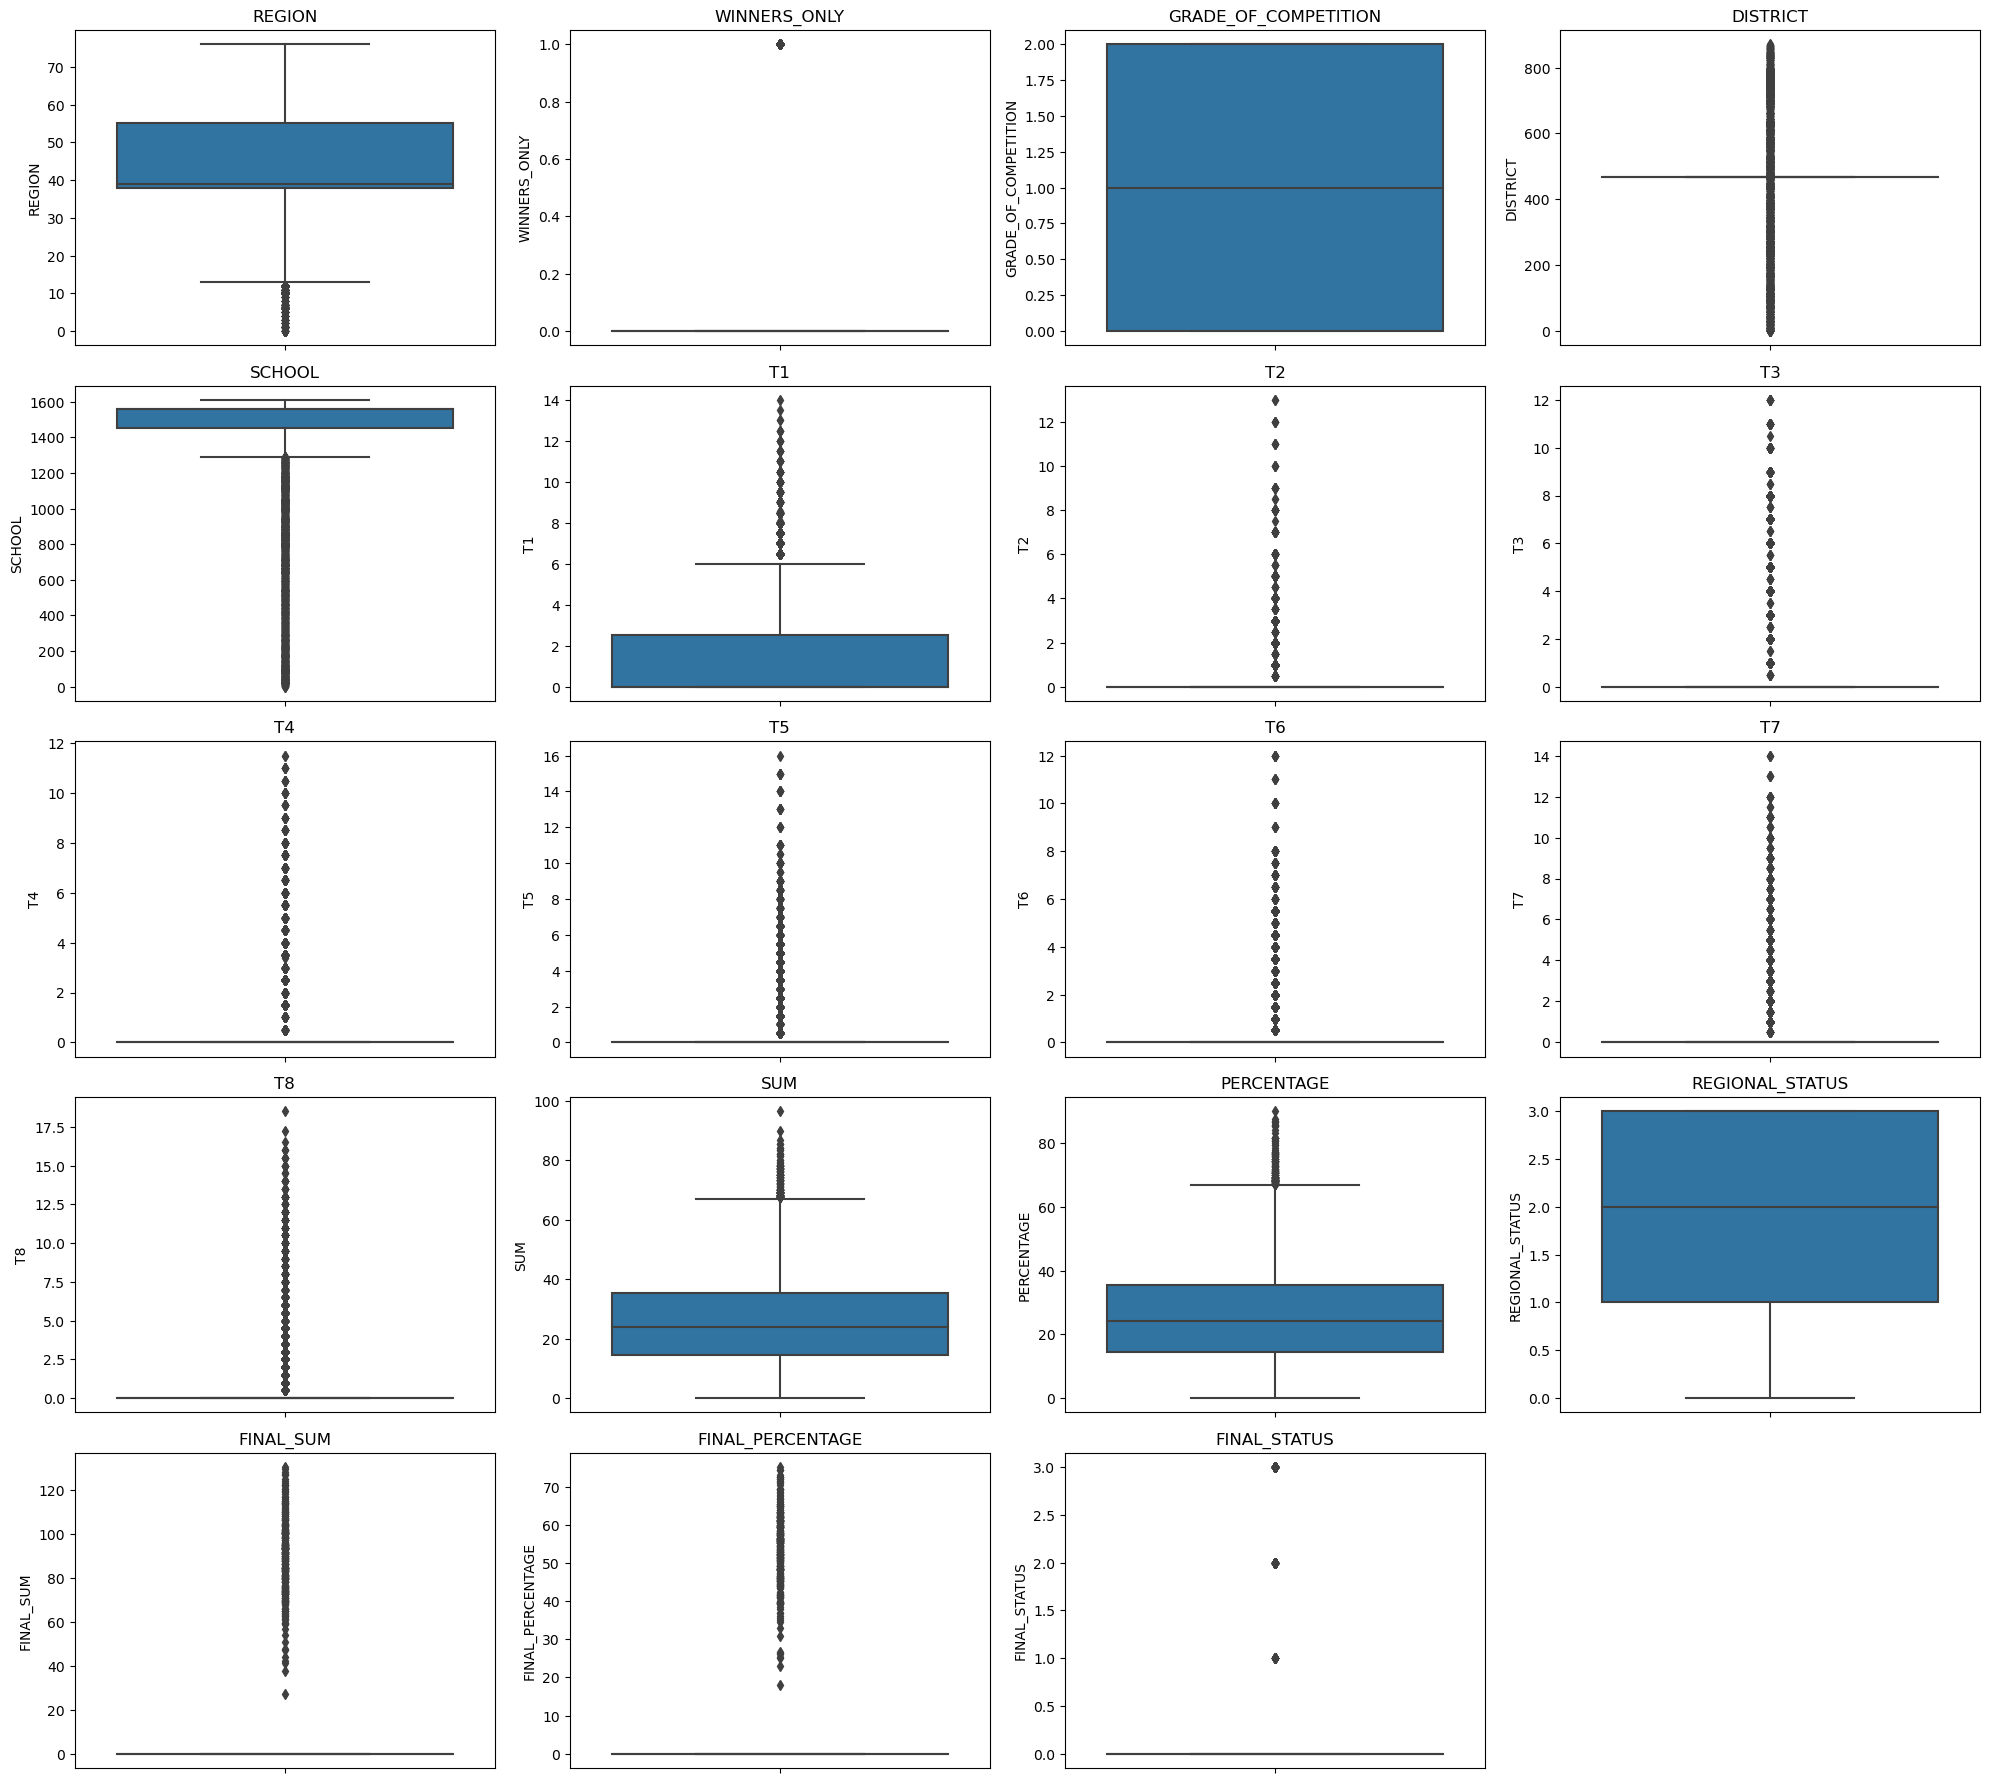

In [782]:
# Выбираем все числовые столбцы
df_selected = df[select_columns]

# Создаем подграфики для каждого числового столбца
plt.figure(figsize=(20, 25))
for i, column in enumerate(df_selected.columns):
    plt.subplot(7, 4, i+1) # Создаем матрицу 7x4
    sns.boxplot(y=df_selected[column])
    plt.title(column, fontsize=12)
    plt.tight_layout()
plt.show()

В данных отсутствуют явные признаки зависимостей или закономерностей между записями.

 # Отчёт

### В ходе данной работы было выполнено:

1. Анализ основных свойств данных;
2. Нахождение закономерностей между признаками;
3. Визуализация графиков распределений и их проверка на нормальность;
4. Нахождение аномалий;
5. Визуализация зависимостей на тепловой карте;
6. Построение дашбордов с полезными элементами.

### Ссылка на дашборд:
https://datalens.yandex/nfeesqn3clj29

#

#

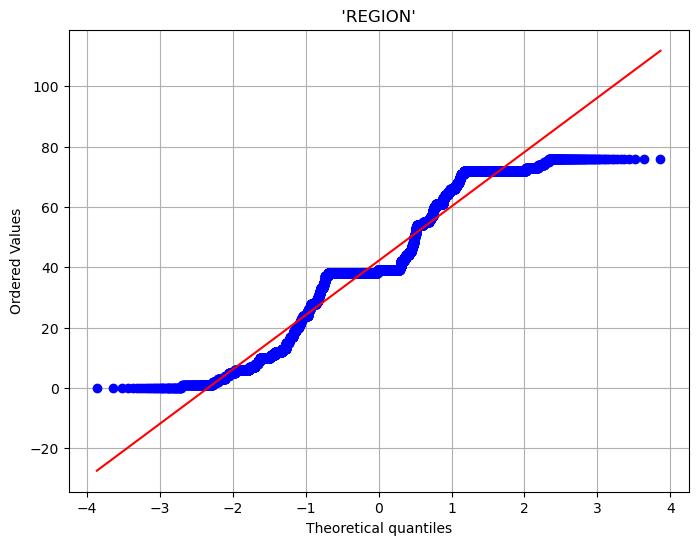

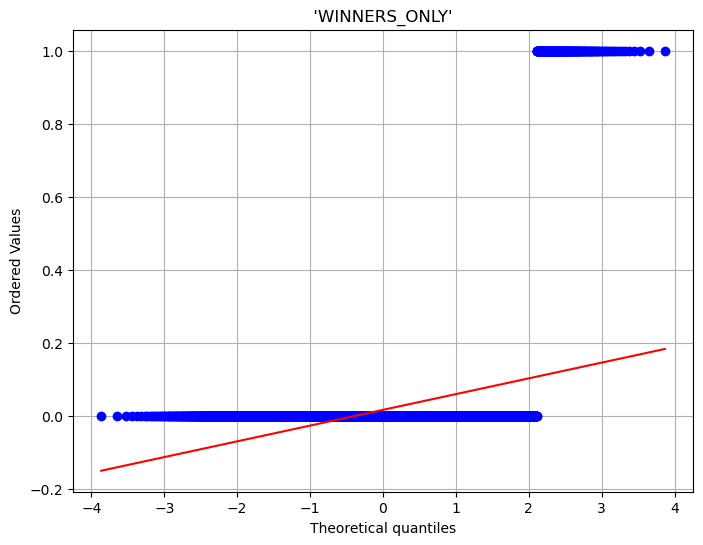

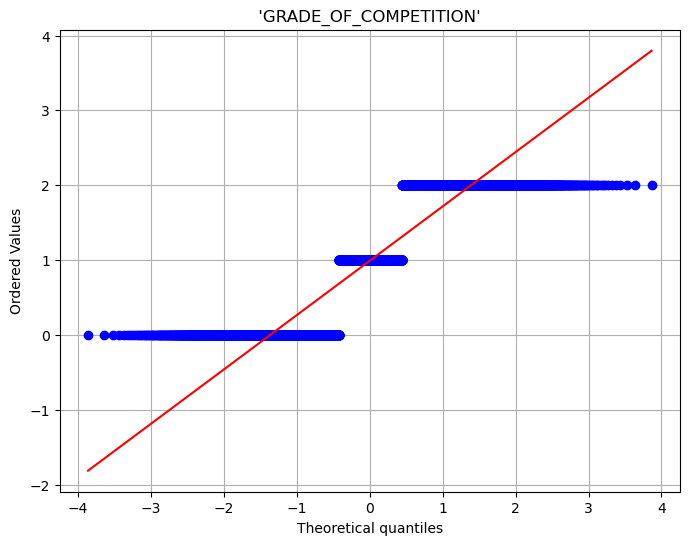

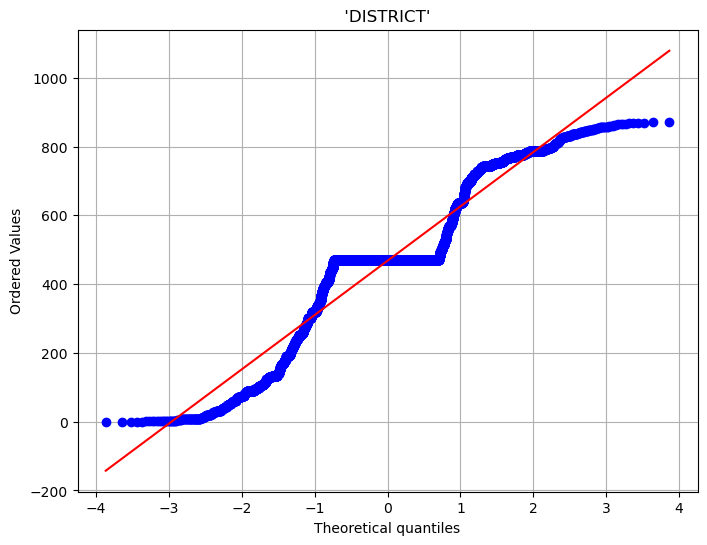

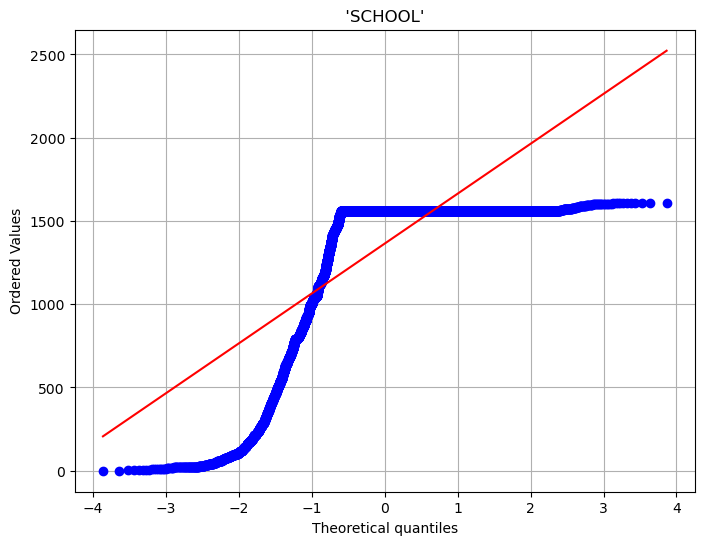

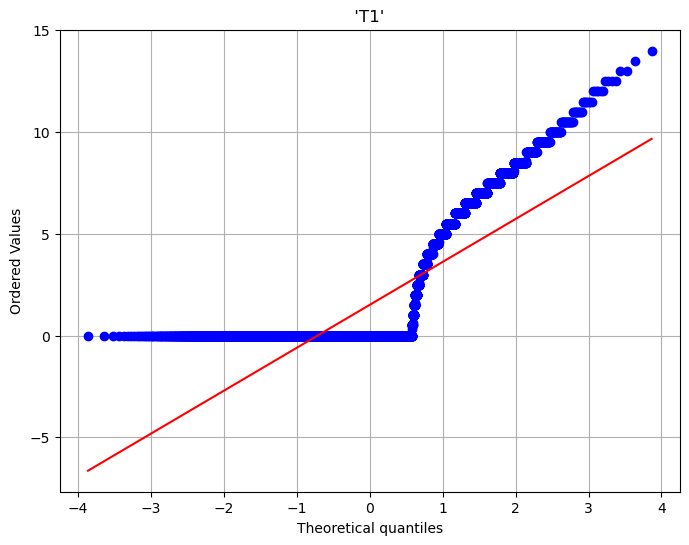

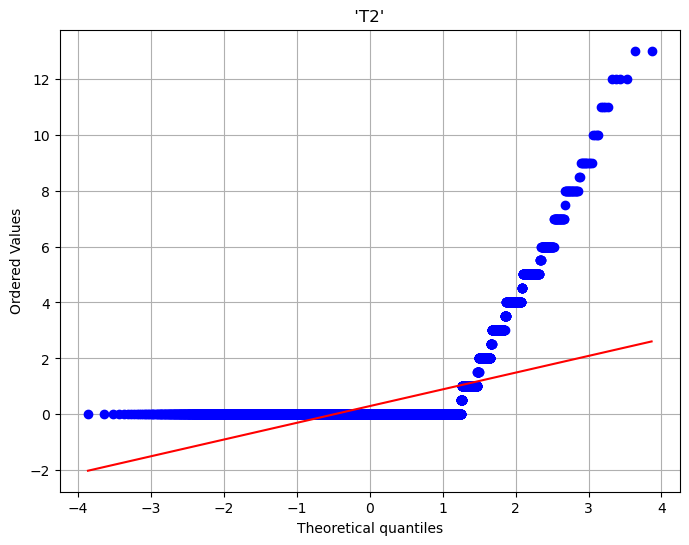

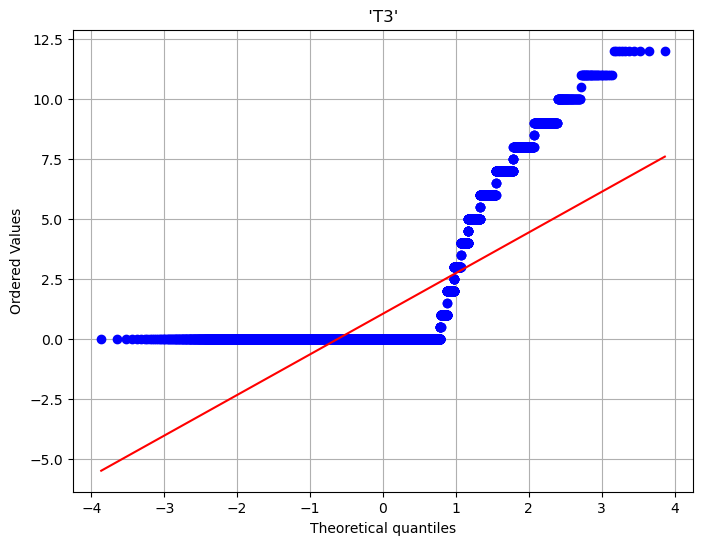

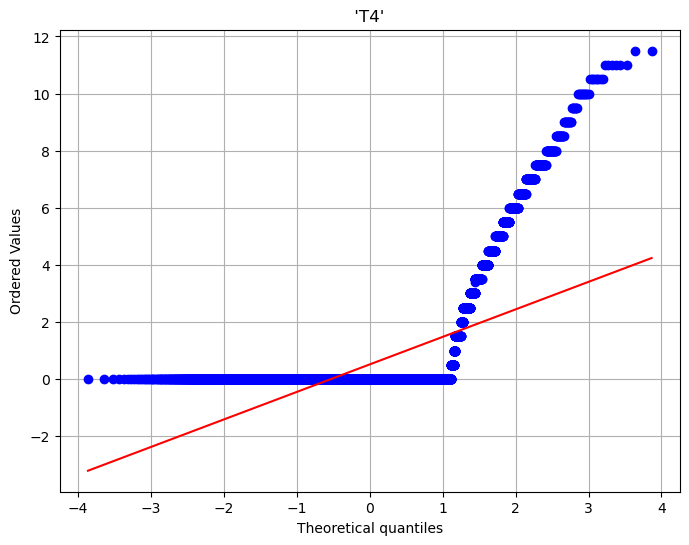

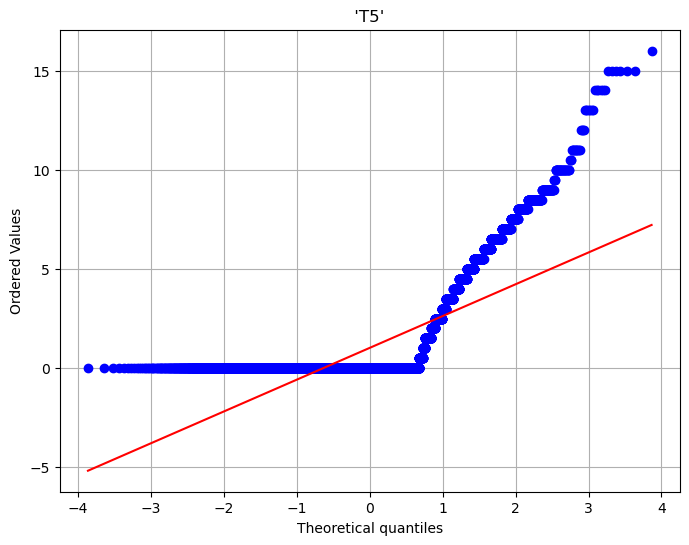

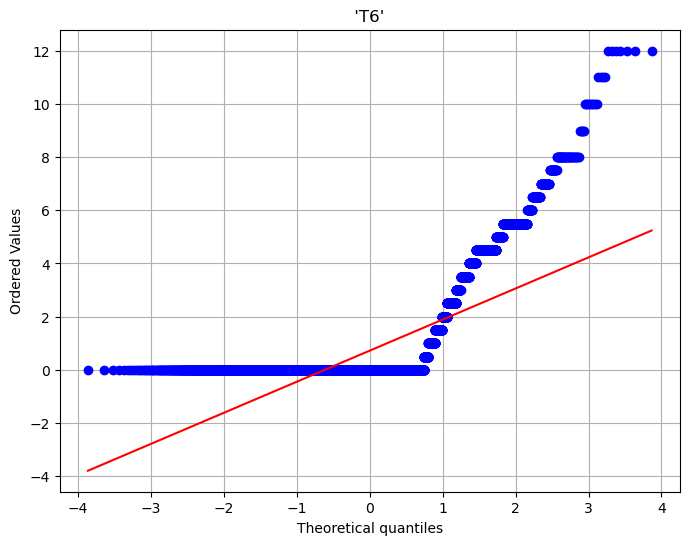

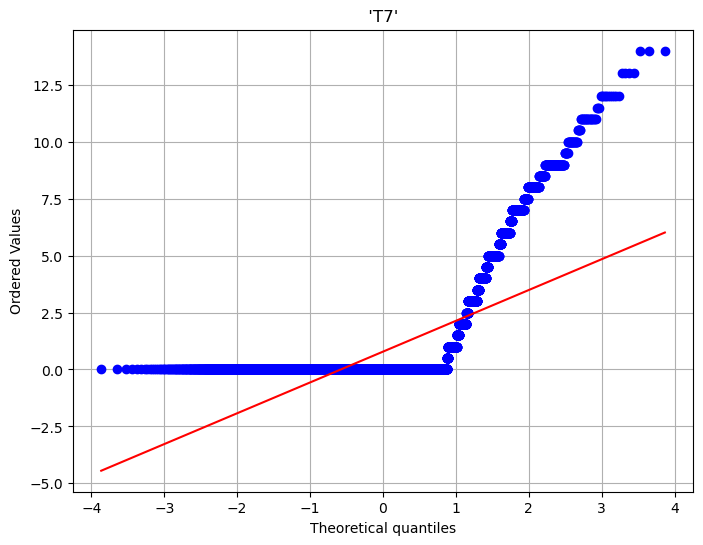

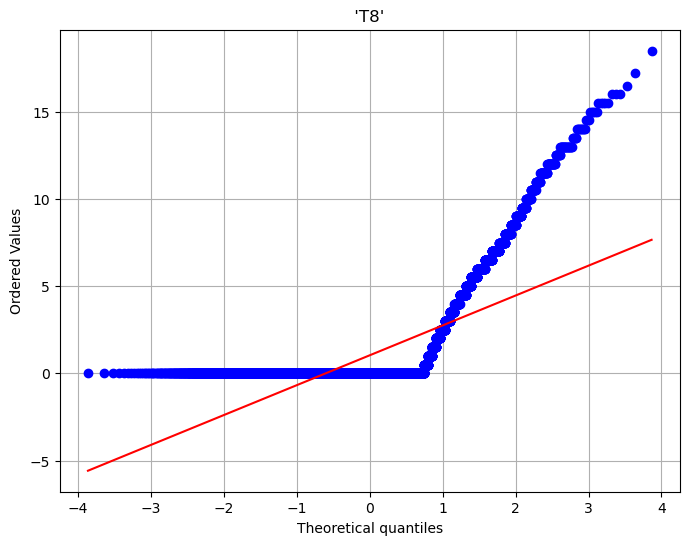

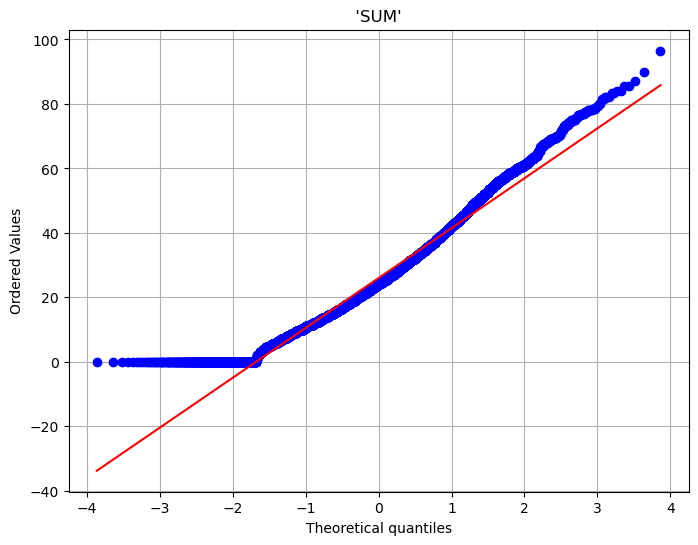

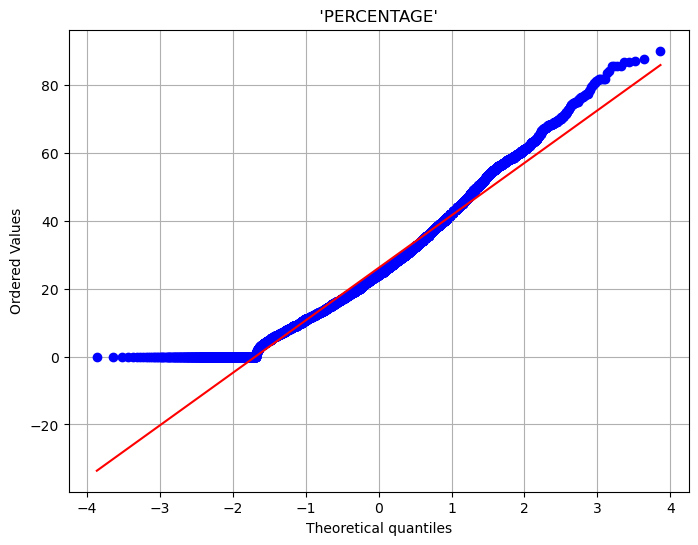

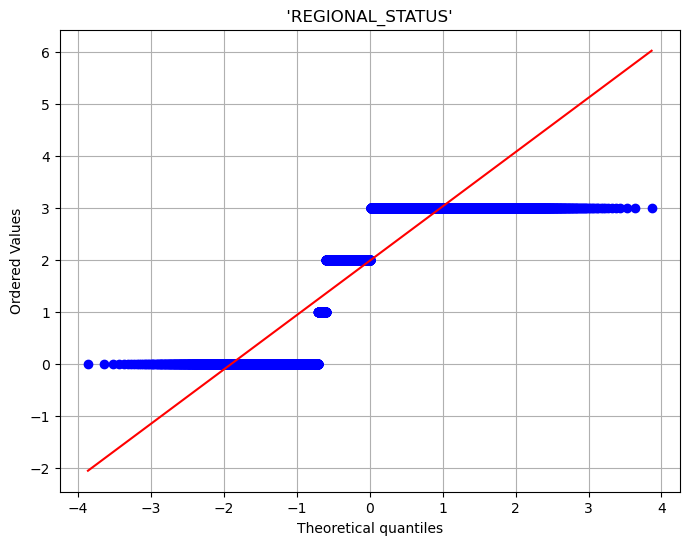

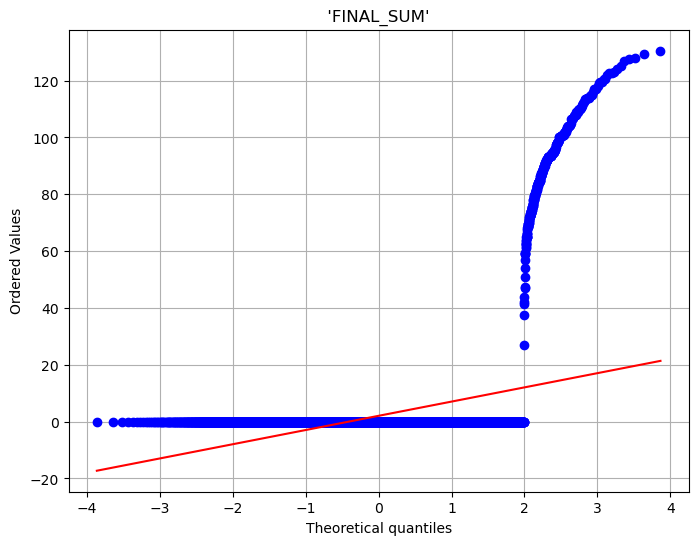

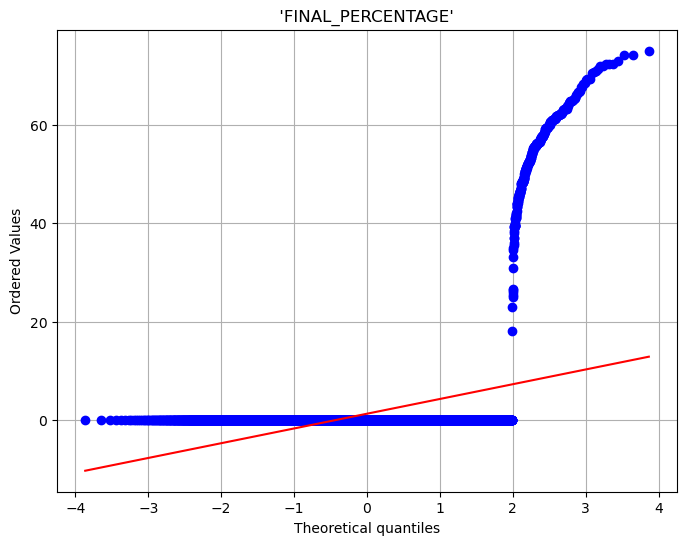

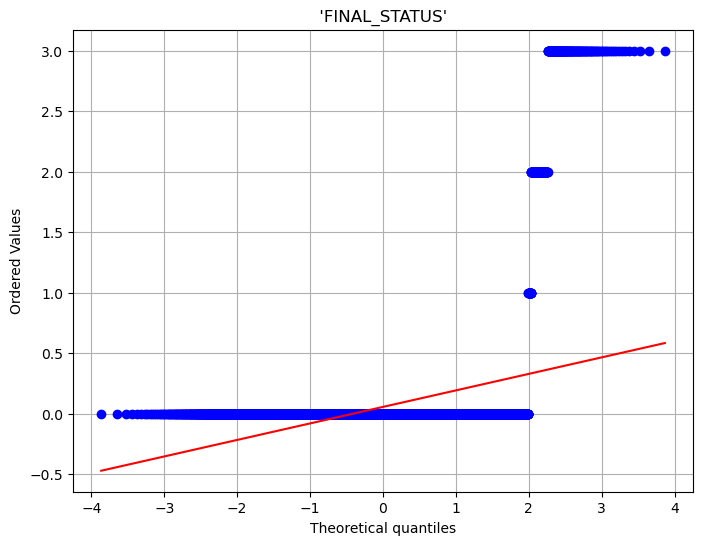

In [783]:
import scipy.stats as stats

def plot_qq(df_selected, columns, distribution="norm"):
    
    for column in columns:
        plt.figure(figsize=(8, 6))
        stats.probplot(df_selected[column], dist=distribution, plot=plt)
        plt.title(f" '{column}' ")
        plt.ylabel("Ordered Values")
        plt.grid(True)
        plt.show()

# Задаем распределение (по умолчанию нормальное)
distribution_type = 'norm'

# Строим Q-Q plots
plot_qq(df_selected, df_selected, distribution_type)

## Кластеризация.

Рассмотрим 3 вида кластеризации на основе KMeans, AgglomerativeClustering, NearestNeighbors, DBSCAN

In [784]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGION                12496 non-null  int32  
 1   WINNERS_ONLY          12496 non-null  int64  
 2   GRADE_OF_COMPETITION  12496 non-null  int64  
 3   DISTRICT              12496 non-null  int32  
 4   SCHOOL                12496 non-null  int32  
 5   T1                    12496 non-null  float64
 6   T2                    12496 non-null  float64
 7   T3                    12496 non-null  float64
 8   T4                    12496 non-null  float64
 9   T5                    12496 non-null  float64
 10  T6                    12496 non-null  float64
 11  T7                    12496 non-null  float64
 12  T8                    12496 non-null  float64
 13  SUM                   12496 non-null  float64
 14  PERCENTAGE            12496 non-null  float64
 15  REGIONAL_STATUS    

In [837]:
X = df_selected.loc[:, ['SUM', 'FINAL_SUM']].values
# регион и район 

### KMeans

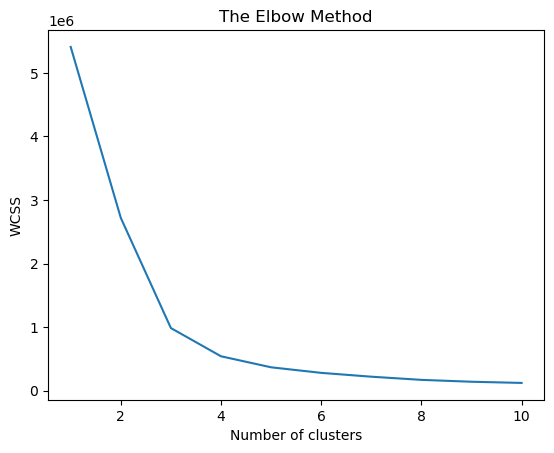

In [838]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

С помощью "Elbow Method" (метод локтя) в алгоритме кластеризации K-means, можем определить оптимальное кол-во кластеров в данных = 3

In [787]:
num_clusters = 3

In [788]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [789]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [790]:
pred=kmeans.fit_predict(X)

In [791]:
df_selected['cluster'] = pd.Series(labels)

Добавили новый столбец 'cluster' в датасет df, который содержит метки кластеров, полученные после выполнения кластеризации

In [792]:
df_selected

,REGION,WINNERS_ONLY,GRADE_OF_COMPETITION,DISTRICT,SCHOOL,T1,T2,T3,T4,T5,T6,T7,T8,SUM,PERCENTAGE,REGIONAL_STATUS,FINAL_SUM,FINAL_PERCENTAGE,FINAL_STATUS,cluster
0,0,0,0,130,78,8.5,0.0,2.0,0.0,4.0,3.5,2.0,3.5,23.5,26.1,0,0.0,0.0,0,4.0
1,0,0,0,265,1537,4.5,0.0,2.0,0.0,5.5,4.5,2.0,1.5,20.0,22.2,0,0.0,0.0,0,0.0
2,0,0,0,126,1533,3.0,0.0,3.0,0.0,8.5,0.0,3.0,1.0,18.5,20.6,0,0.0,0.0,0,1.0
3,0,0,0,274,76,5.5,1.0,1.0,3.0,5.5,0.5,0.0,1.5,18.0,20.0,0,0.0,0.0,0,2.0
4,0,0,0,274,1531,8.5,0.0,2.0,0.0,4.5,0.0,0.0,1.0,16.0,17.8,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12491,32,1,2,469,1561,2.5,0.0,8.0,6.5,2.5,2.5,8.5,6.0,36.5,33.2,2,0.0,0.0,0,NaN
12492,32,1,2,469,1561,5.0,1.0,5.0,3.5,4.0,5.5,1.5,5.5,31.0,28.2,2,0.0,0.0,0,NaN
12493,32,1,2,469,1561,6.0,0.0,0.0,3.5,5.0,5.5,5.0,4.5,29.5,26.8,2,0.0,0.0,0,NaN
12494,32,1,2,469,1561,4.5,0.0,6.0,4.0,0.0,4.5,3.5,4.0,26.5,24.1,2,0.0,0.0,0,NaN


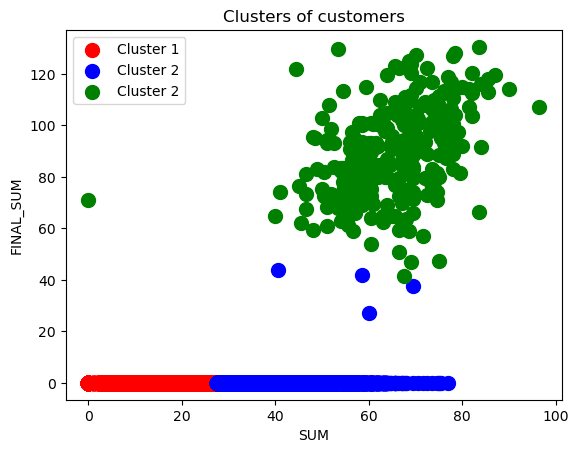

In [793]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.xlabel('SUM')
plt.ylabel('FINAL_SUM')

plt.title('Clusters of customers')
plt.legend()
plt.show()

In [794]:
df_selected['cluster'].value_counts()

cluster
 0.0    71
 2.0    70
 3.0    38
-1.0    37
 4.0    32
 1.0    26
 5.0    26
Name: count, dtype: int64

Больше всего значений отнеслись к кластеру 2, меньше всего к 1 кластеру.

In [795]:
scores = []
values = np.arange(2, 10)

In [796]:
from sklearn import metrics

for num_clusters in values:

    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.830463473585917

Number of clusters = 3
Silhouette score = 0.57888090746864

Number of clusters = 4
Silhouette score = 0.5500280485319953

Number of clusters = 5
Silhouette score = 0.5402256086218629

Number of clusters = 6
Silhouette score = 0.5336541586033884

Number of clusters = 7
Silhouette score = 0.5265681661087226

Number of clusters = 8
Silhouette score = 0.5350733312138206

Number of clusters = 9
Silhouette score = 0.5344452399559539


Выполнили итерацию по диапазону значений количества кластеров, вычислили Silhouette Score для оценки качества кластеризации.

Заметим, что оптимальное количество кластеров, которое следует взять - 2, так как значение равно 0,83.

In [797]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

57650.49741607874

In [798]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5806927839254601

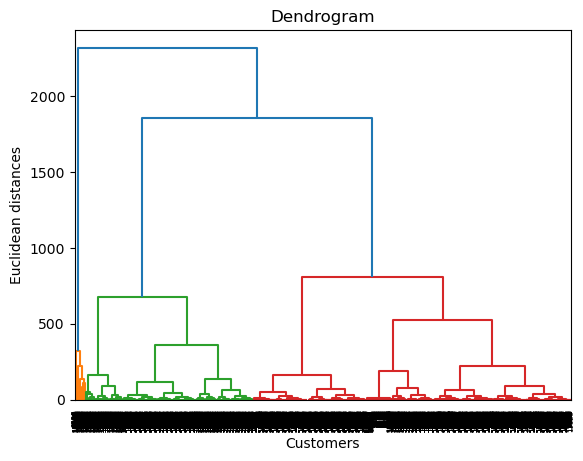

In [799]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### AgglomerativeClustering

In [800]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

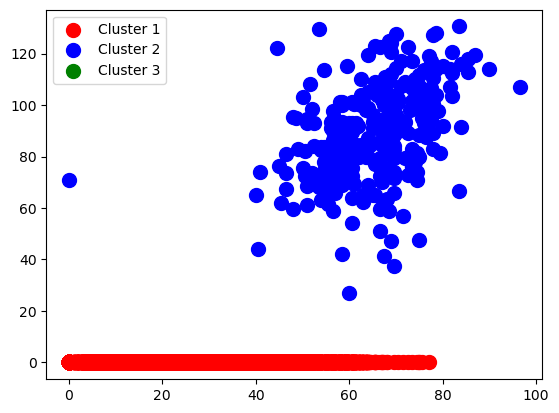

In [801]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [802]:
metrics.silhouette_score(X, y_hc)

0.8297979685133574

In [803]:
metrics.calinski_harabasz_score(X, y_hc)

12330.33002113185

In [804]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5806927839254601

### DBSCAN

In [852]:
X = (X - X.mean(axis=0))/X.std(axis=0)
# стандартизация данных

In [853]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.2, metric='haversine', min_samples=20)

In [854]:
labels = dbscan.labels_

In [855]:
pd.Series(labels).value_counts()

 0    12321
-1      155
 1       20
Name: count, dtype: int64

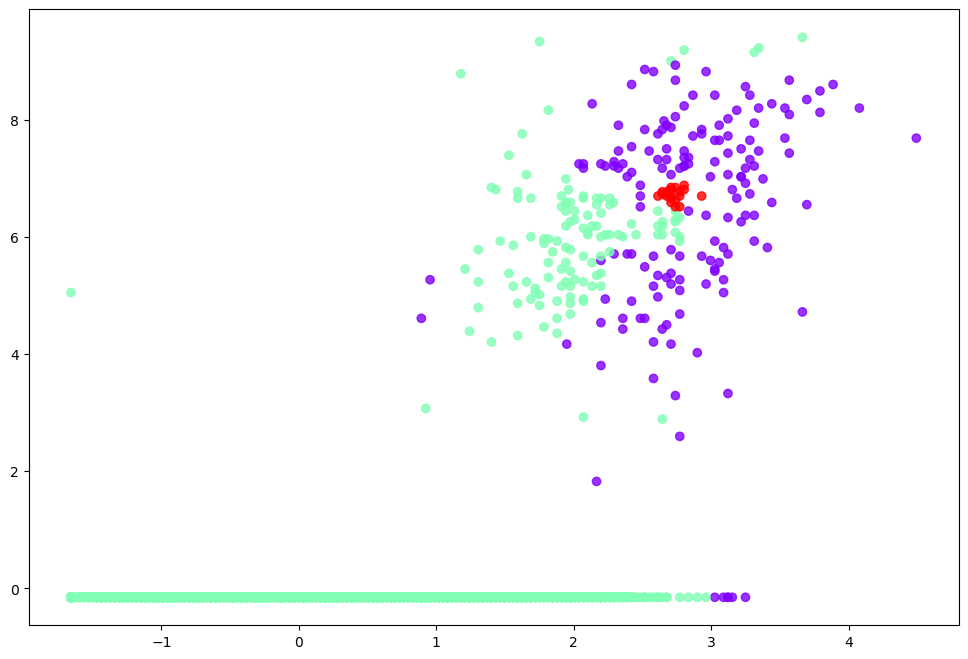

In [856]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)

In [857]:
metrics.silhouette_score(X, labels)

0.8169102396475771

In [858]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5629031204613792

In [859]:
dbscan = DBSCAN(eps=0.1, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.1, metric='haversine', min_samples=20)

In [860]:
labels = dbscan.labels_

In [861]:
pd.Series(labels).value_counts()

 0    12248
-1      248
Name: count, dtype: int64

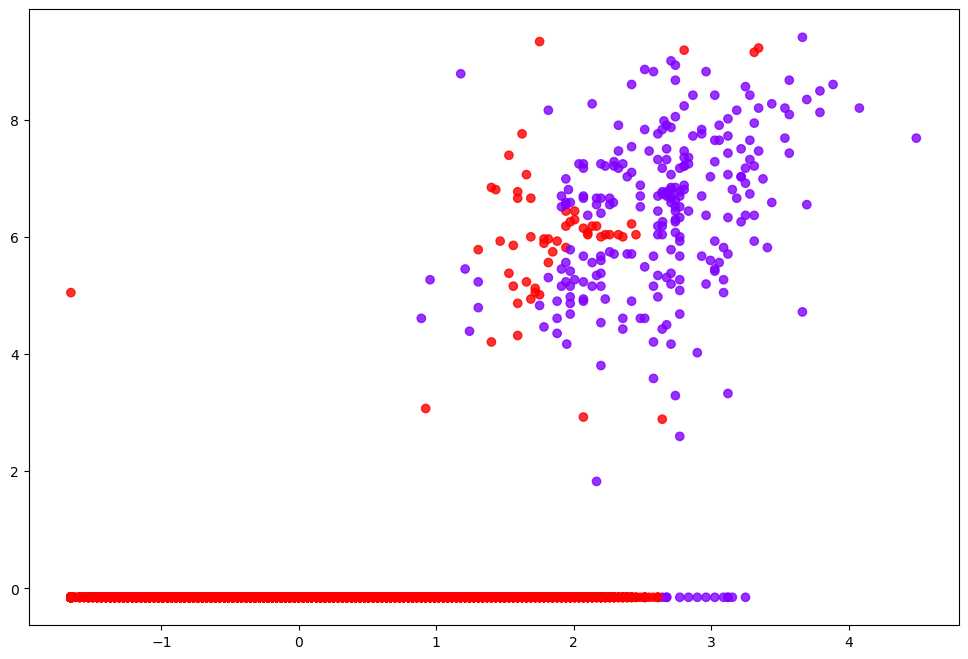

In [862]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)

In [863]:
metrics.silhouette_score(X, labels)

0.8350729061360082

In [864]:
metrics.calinski_harabasz_score(X, labels)

10127.304976247258

In [865]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5629031204613792

# Отчёт